### Область работы 1 (библиотеки)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
print('sklearn:', sklearn.__version__)
print("pandas:", pd.__version__)

sklearn: 1.5.1
pandas: 2.2.2


(нашла в интернетах по теме)        
Показатели здоровья при сахарном диабете          
Этот набор данных показывает долю больных сахарным диабетом и тех, у кого его нет, набор данных представлен в формате                
Наиболее важной функцией для этого проекта является Diabetes_Types (ответ).     

Вопросы:       
Какие факторы риска в наибольшей степени влияют на риск развития диабета?       
В каком возрасте чаще всего заболевают диабетом?        
У какого пола чаще всего развивается диабет?       
  

In [7]:
y = pd.read_csv('train_Y.csv')

In [8]:
y

,Diabetes_binary
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
47358,1.0
47359,0.0
47360,1.0
47361,0.0


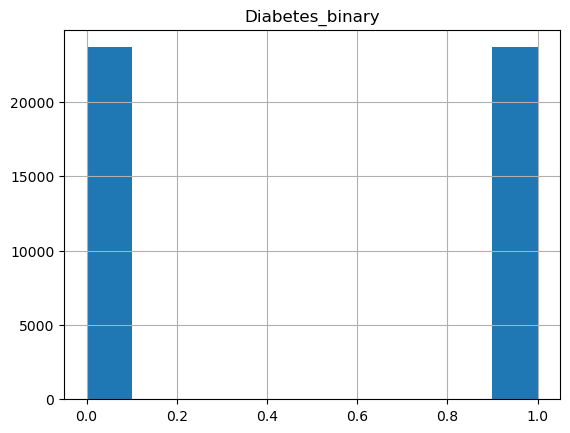

In [9]:
y.hist();

я подумала, что проще будет работать если таргет и фичи будут в одном датафрейме (как минимум всякие повторки будет проще удалить), поэтому объединила     
(впрочем, вроде это не запрещено :))

In [10]:

path_train['Diabetes_binary'] = y['Diabetes_binary']

#### 1. EDA анализ.     
стандартный набор проверок на пропуски, повторки и, конечно, куча графиков, на которые положено смотреть с умным видом. ну по традиции!        


In [11]:
path_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,...,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000
mean,0.563879,0.523468,0.975741,29.862551,0.475118,0.062834,0.148766,0.701940,0.610814,0.788844,...,0.094145,2.835272,3.732829,5.788105,0.252349,0.457213,8.587294,4.923485,5.703292,0.500011
std,0.495908,0.499454,0.153855,7.144498,0.499386,0.242666,0.355861,0.457411,0.487571,0.408133,...,0.292034,1.112528,8.145554,10.044184,0.434365,0.498171,2.847747,1.027849,2.174629,0.500005
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [12]:
print(type(path_train))

<class 'pandas.core.frame.DataFrame'>


1) проверка на пропуски 

In [12]:
null_data = path_train[path_train.isnull().any(axis=1)]
null_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary


In [13]:
filtered_data = path_train[(path_train == 0).all(axis=1)]
filtered_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary


2) проверка на дубликаты 

In [14]:
path_train[path_train.duplicated()]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
882,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,0.0
1440,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0,0.0
2023,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0,0.0
2239,1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,12.0,5.0,7.0,1.0
2412,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,7.0,6.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47243,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0
47270,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0
47319,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0,0.0
47344,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0,0.0


In [15]:
path_train.duplicated().sum()

785

In [16]:
path_train.drop_duplicates(inplace=True)
path_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.00000,...,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,0.569496,0.527717,0.975396,29.934604,0.480205,0.063893,0.150908,0.697153,0.606102,0.78550,...,0.095732,2.854588,3.795247,5.885289,0.256602,0.457147,8.601979,4.908304,5.668749,0.505968
std,0.495152,0.499237,0.154916,7.168650,0.499613,0.244565,0.357963,0.459494,0.488618,0.41048,...,0.294226,1.108264,8.199532,10.100270,0.436762,0.498166,2.853608,1.027933,2.174496,0.499970
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


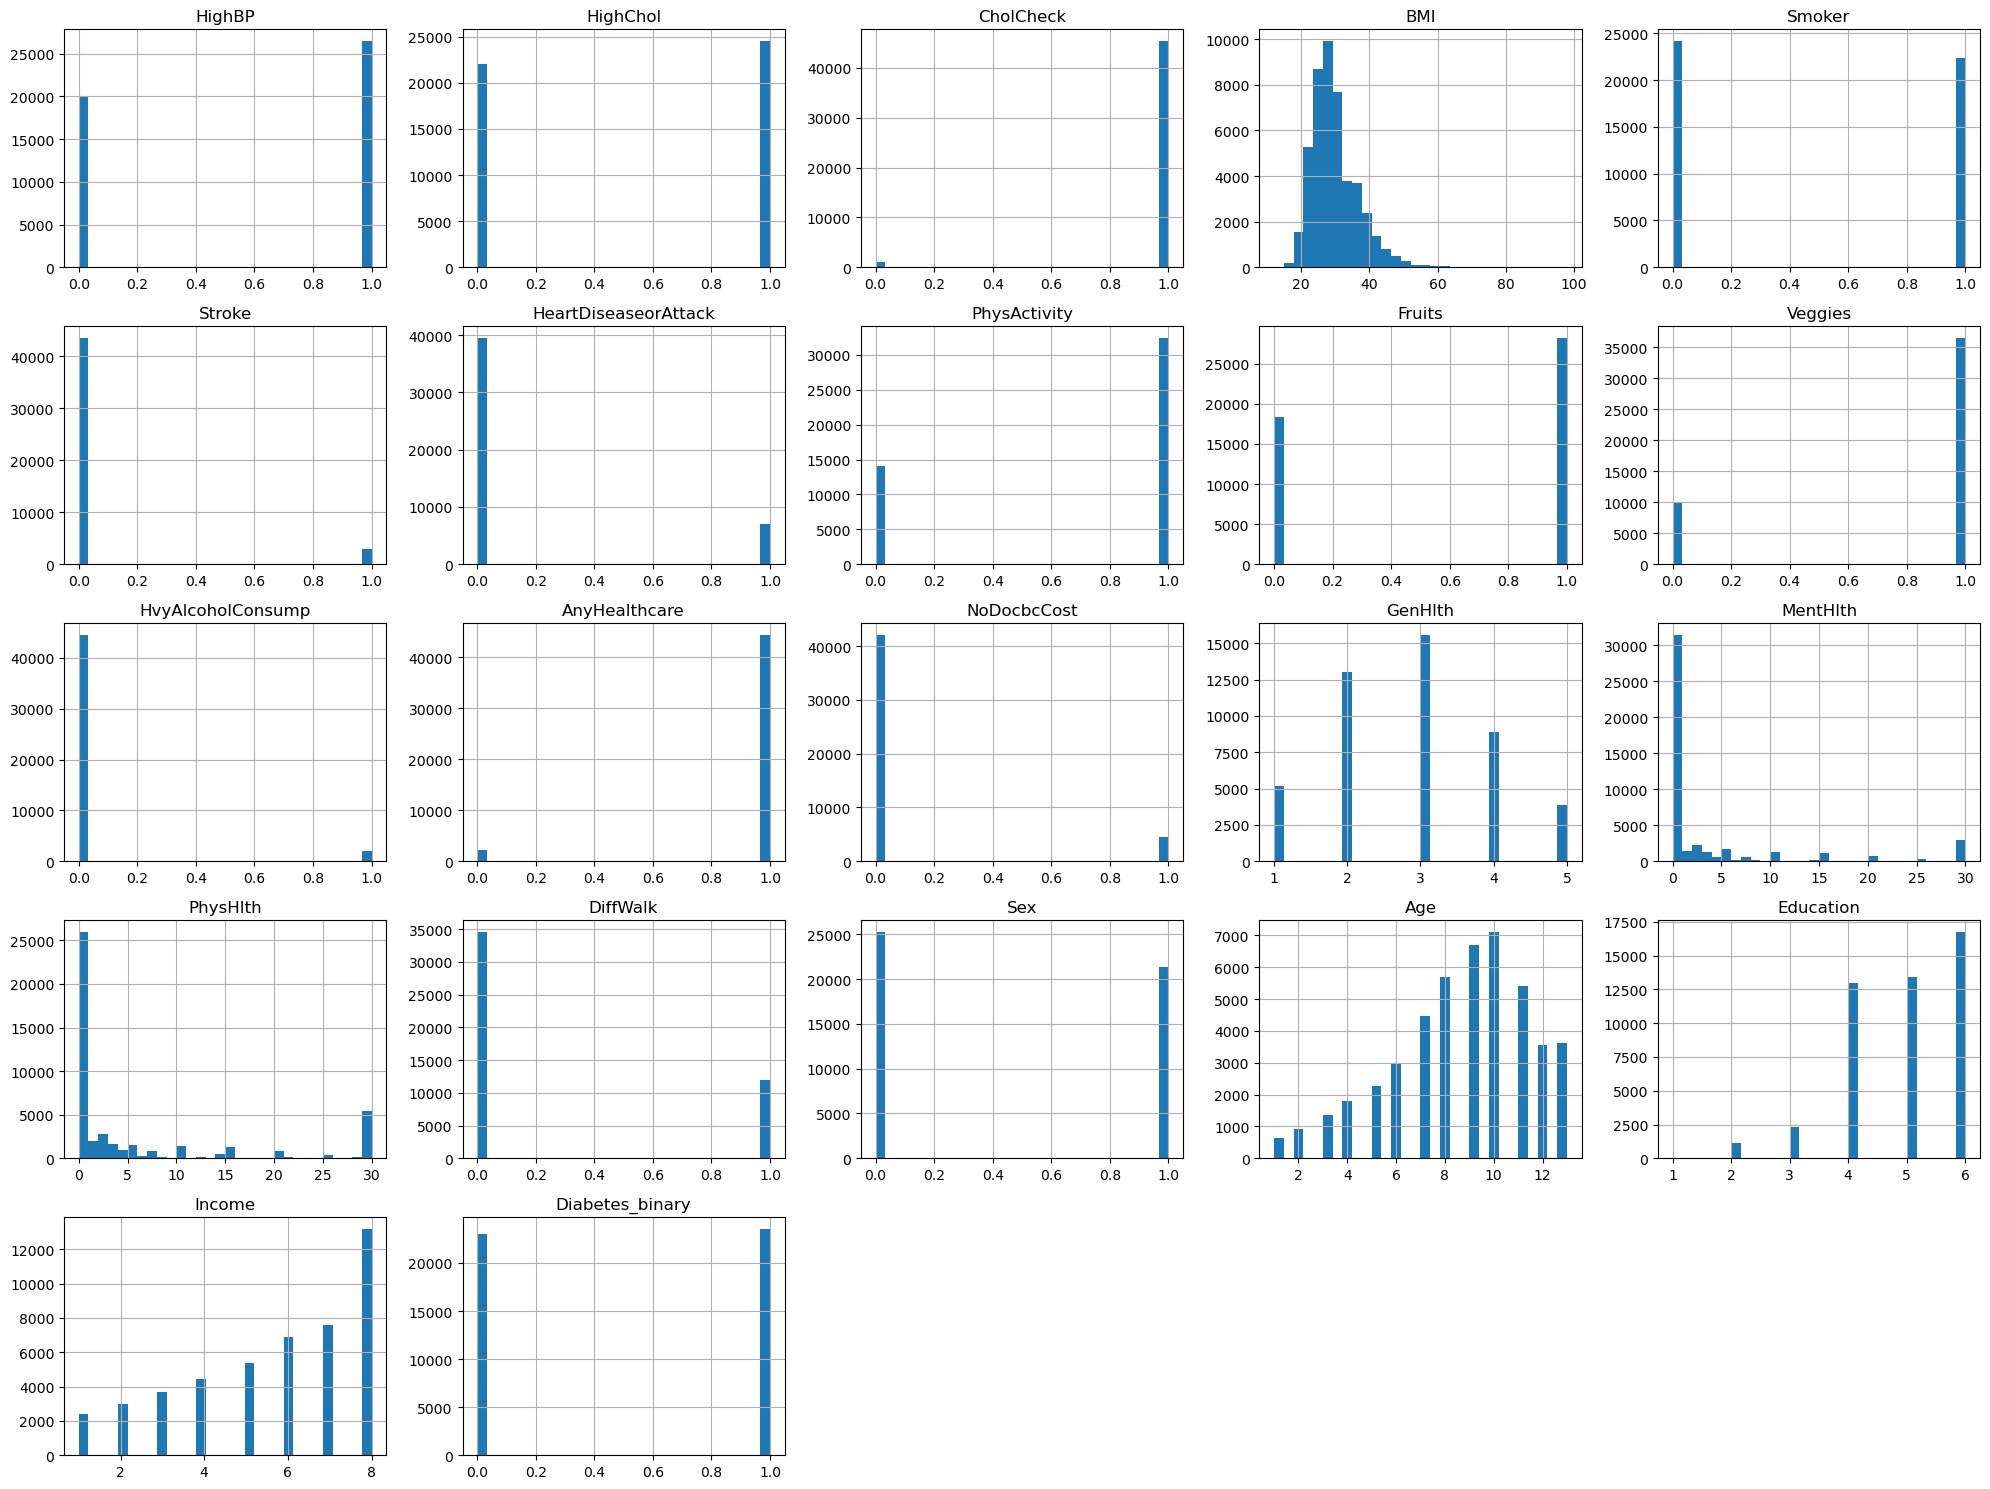

In [17]:
path_train.hist(bins=30, figsize=(20, 15)) 
plt.tight_layout()  
plt.show()

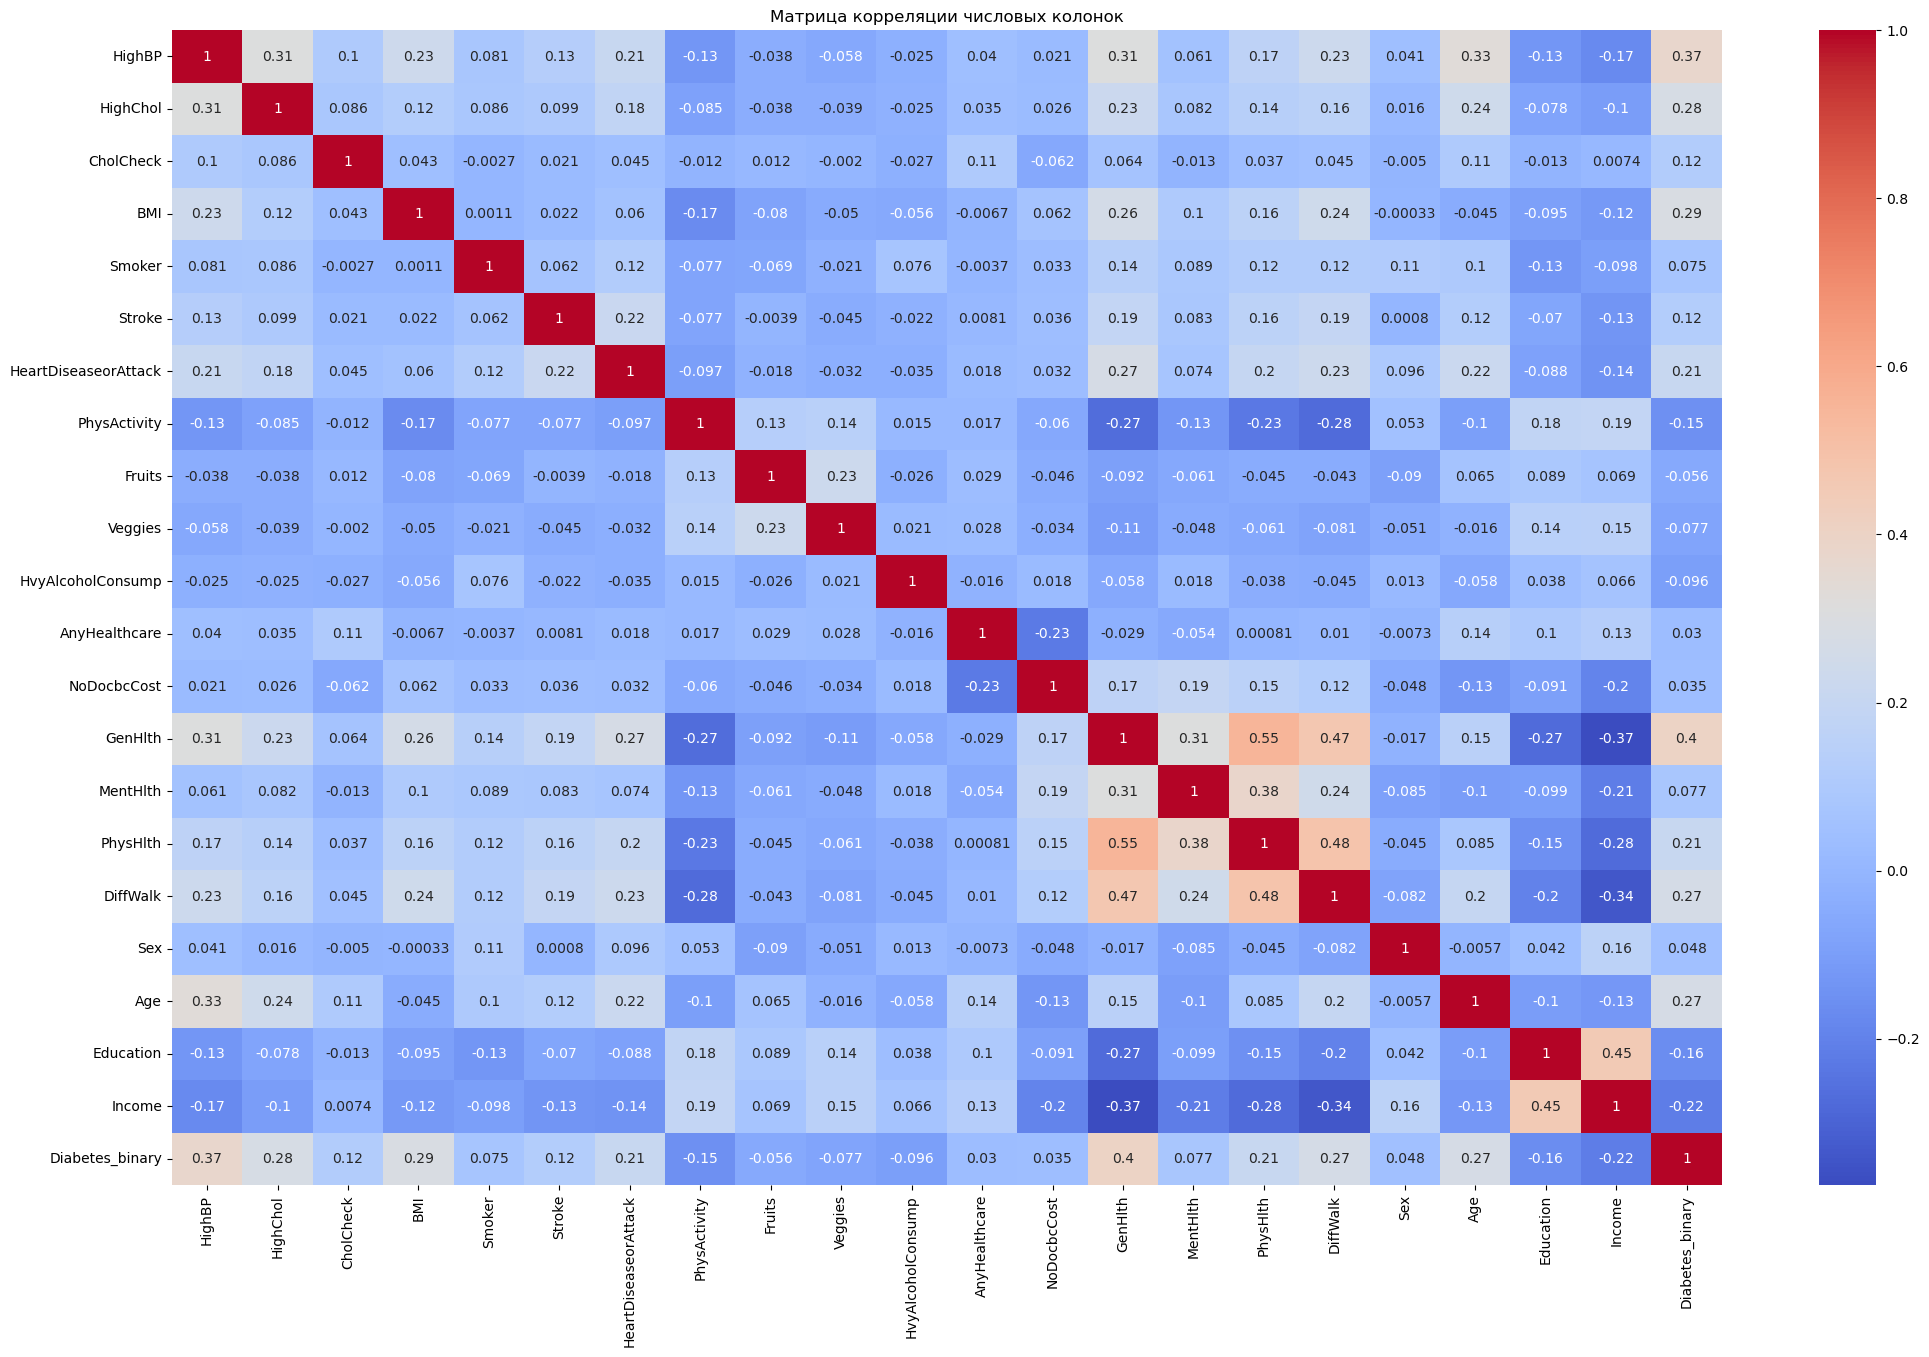

In [18]:
corr_matrix = path_train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции числовых колонок')
plt.show()

вот это нам необходимо чтобы видеть в удобном виде наши фичи и все их вариации :)

In [19]:
for col in path_train.columns:
    unique_vals = path_train[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки HighBP: [0. 1.]
Уникальные элементы колонки HighChol: [0. 1.]
Уникальные элементы колонки CholCheck: [1. 0.]
Уникальные элементы колонки BMI: [23. 35. 30. 26. 36. 33. 21. 37. 27. 31. 24. 28. 43. 19. 34. 29. 20. 38.
 50. 25. 41. 32. 49. 46. 39. 48. 22. 42. 18. 45. 47. 40. 53. 15. 44. 70.
 17. 84. 55. 56. 51. 57. 64. 77. 16. 52. 76. 63. 92. 58. 95. 66. 73. 54.
 60. 61. 12. 59. 65. 71. 87. 82. 79. 62. 72. 14. 67. 81. 98. 13. 68. 89.
 69. 75. 74. 83. 78. 80.]
Уникальные элементы колонки Smoker: [1. 0.]
Уникальные элементы колонки Stroke: [0. 1.]
Уникальные элементы колонки HeartDiseaseorAttack: [1. 0.]
Уникальные элементы колонки PhysActivity: [1. 0.]
Уникальные элементы колонки Fruits: [1. 0.]
Уникальные элементы колонки Veggies: [0. 1.]
Уникальные элементы колонки HvyAlcoholConsump: [0. 1.]
Уникальные элементы колонки AnyHealthcare: [1. 0.]
Уникальные элементы колонки NoDocbcCost: [0. 1.]
Уникальные элементы колонки GenHlth: [4. 3. 2. 1. 5.]
Уникальные элемент

эх, люблю диаграмки...

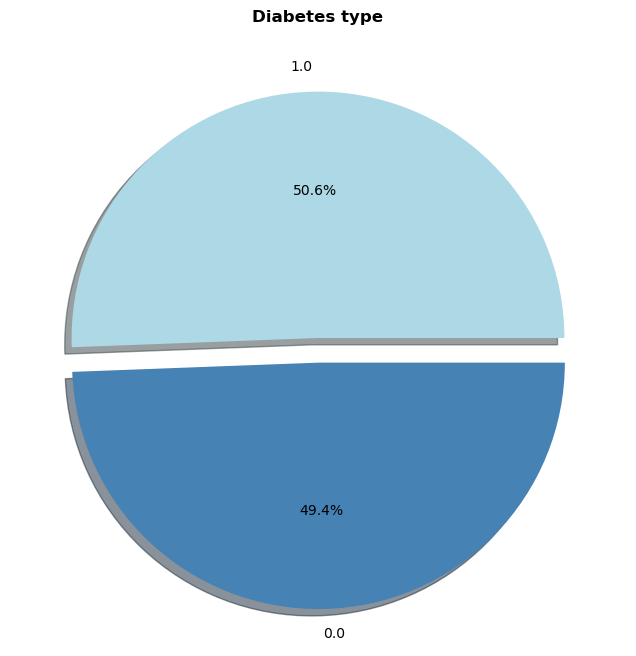

In [20]:
color = ['LightBlue', 'SteelBlue']

plt.figure(figsize=(8, 8))  
path_train['Diabetes_binary'].value_counts().plot.pie(
    explode=[0, 0.1], 
    colors=color, 
    autopct='%1.1f%%', 
    shadow=True
)
plt.title('Diabetes type', fontweight="bold")  
plt.ylabel('')  

plt.show()


In [21]:
diabetes_bp = path_train.groupby(['Diabetes_binary', 'Age']).size().reset_index(name = 'Count')
print(diabetes_bp)

    Diabetes_binary   Age  Count
0               0.0   1.0    609
1               0.0   2.0    831
2               0.0   3.0   1145
3               0.0   4.0   1387
4               0.0   5.0   1581
5               0.0   6.0   1837
6               0.0   7.0   2379
7               0.0   8.0   2843
8               0.0   9.0   2869
9               0.0  10.0   2793
10              0.0  11.0   1955
11              0.0  12.0   1307
12              0.0  13.0   1475
13              1.0   1.0     43
14              1.0   2.0     97
15              1.0   3.0    212
16              1.0   4.0    410
17              1.0   5.0    704
18              1.0   6.0   1164
19              1.0   7.0   2082
20              1.0   8.0   2861
21              1.0   9.0   3820
22              1.0  10.0   4324
23              1.0  11.0   3459
24              1.0  12.0   2261
25              1.0  13.0   2130


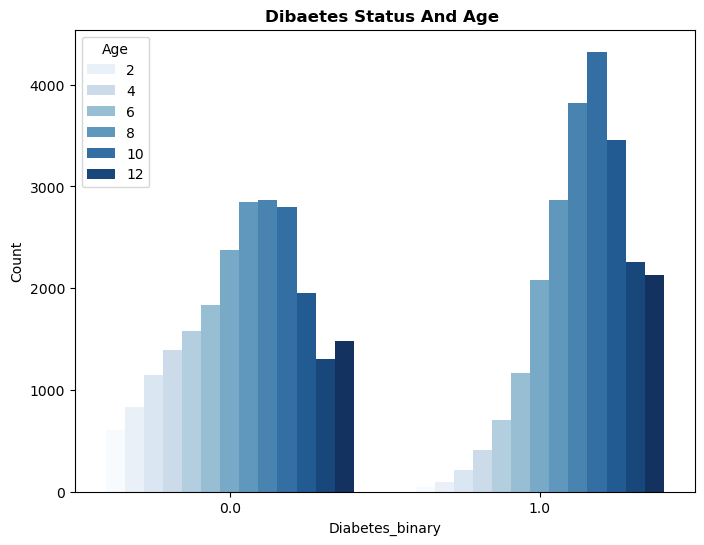

In [22]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'Age', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Age ",fontweight="bold")
plt.show()


In [23]:
diabetes_bp = path_train.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_binary  HighBP  Count
0              0.0     0.0  14203
1              0.0     1.0   8808
2              1.0     0.0   5849
3              1.0     1.0  17718


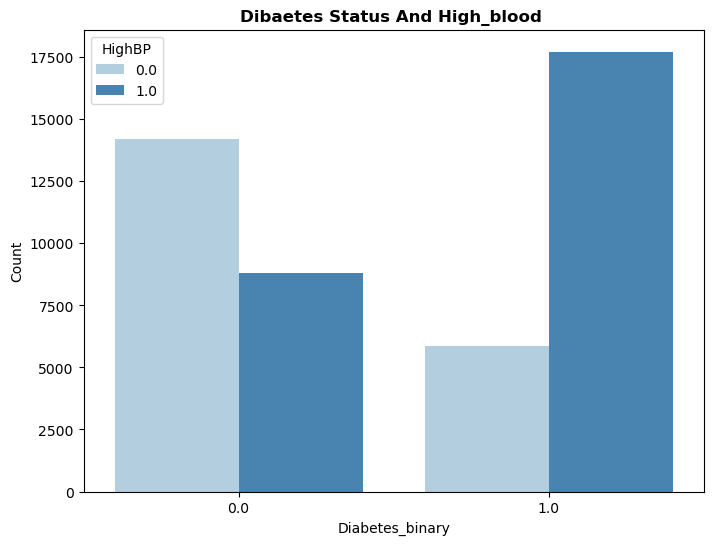

In [24]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighBP', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And High_blood ",fontweight="bold")
plt.show()

In [25]:
diabetes_bp = path_train.groupby(['Diabetes_binary', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_binary  HighChol  Count
0              0.0       0.0  14113
1              0.0       1.0   8898
2              1.0       0.0   7885
3              1.0       1.0  15682


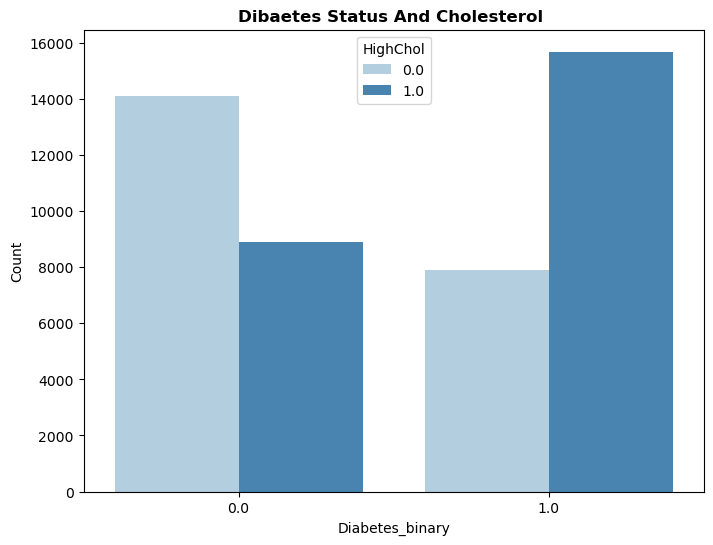

In [26]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = 'HighChol', data =diabetes_bp,palette="Blues")
plt.title("Dibaetes Status And Cholesterol ",fontweight="bold")
plt.show()

сразу все графички в 1 месте. любуемся, думаем...

In [27]:
cat_cols = ['Diabetes_binary', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 
                    'PhysActivity', 'GenHlth','DiffWalk', 'Age']

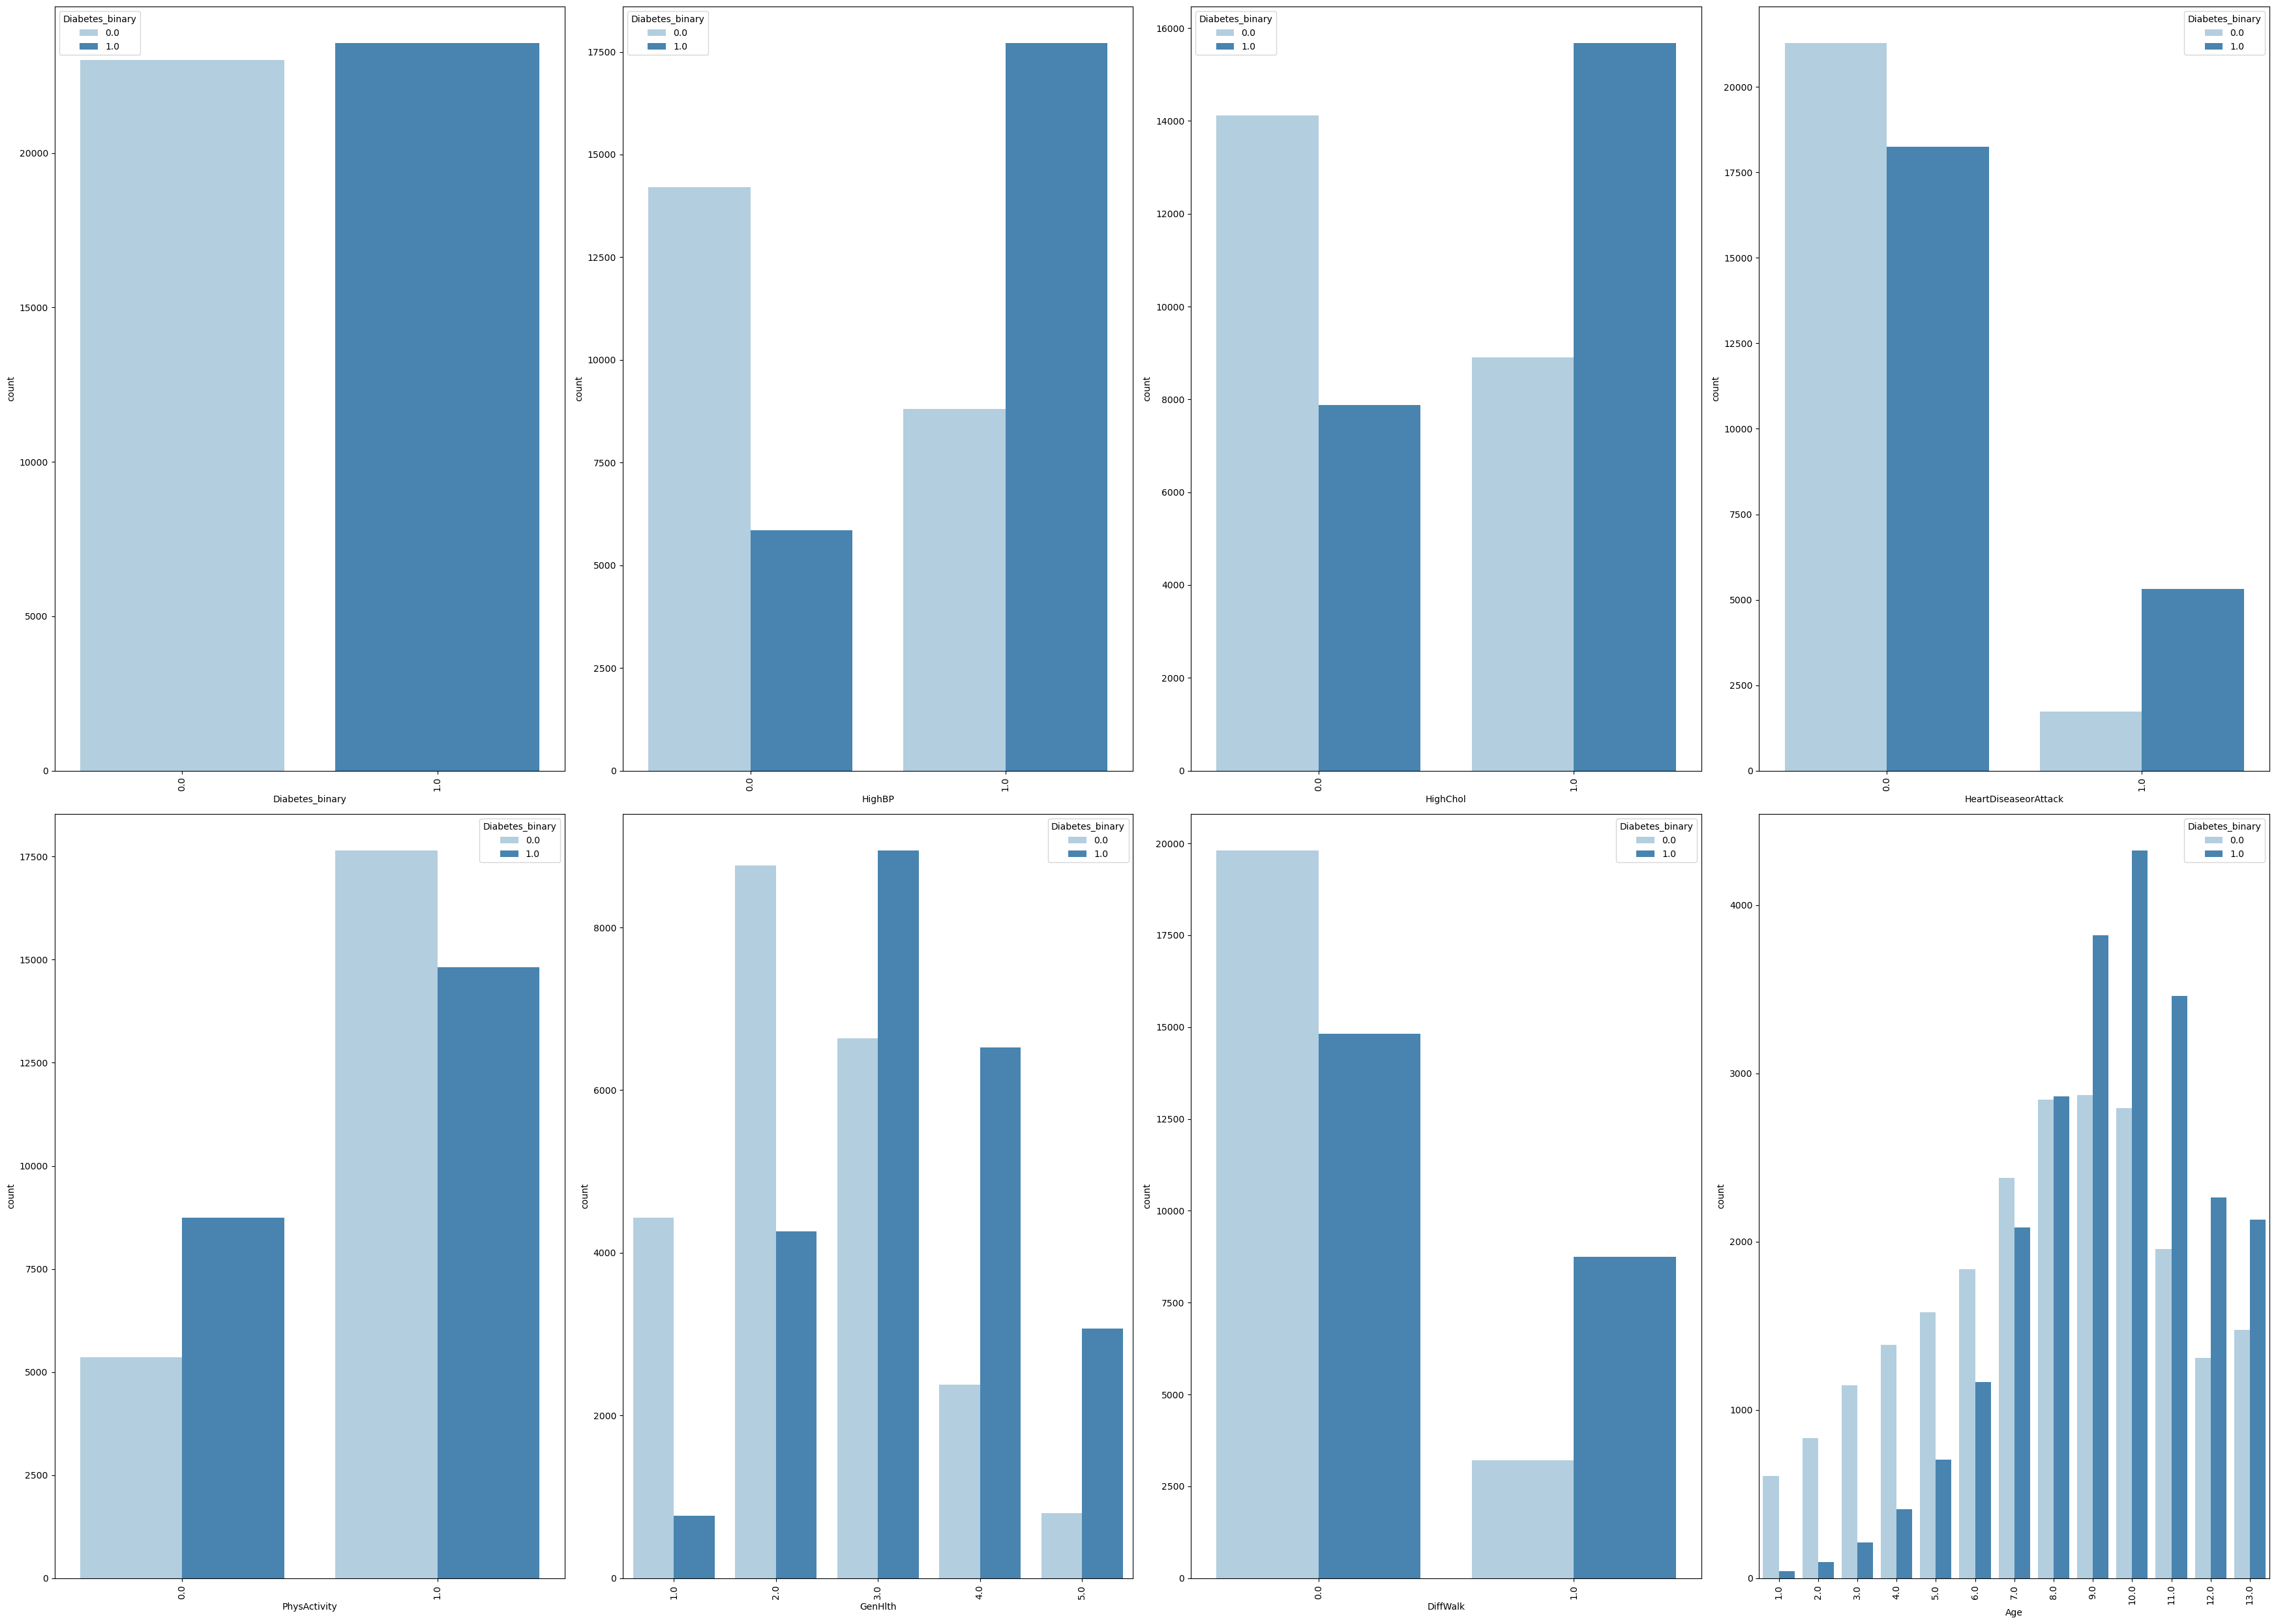

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(35, 25))  
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(data=path_train, x=variable, hue='Diabetes_binary', ax=subplot, palette='Blues')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


plt.tight_layout()
plt.show()

сплитуем данные

In [29]:
X = path_train.drop(['Diabetes_binary'], axis=1)
y = path_train['Diabetes_binary']

надо бы как-то фичи обработать, но т.к. они итак все числовые и без пропусков, то я пока вижу смысл только скайлер на них бахнуть

['HighBP', 'CholCheck', 'BMI', 'Smoker', 'Fruits', 'Education']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, shuffle = True) #shuffle - перемешиваем данные перед разделением
X_test.shape 

(9316, 21)

In [97]:
CT = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'])  
    ],
remainder='passthrough'
)
display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax_scaler', MinMaxScaler(),
                                 ['HighBP', 'HighChol', 'CholCheck', 'BMI',
                                  'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'GenHlth', 'MentHlth',
                                  'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                                  'Education', 'Income'])])

,0,1,2,3,4
0,1.000000,1.000000,1.000000,0.000000,1.000000
1,1.000000,0.000000,1.000000,0.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.141176,0.317647,0.341176,0.247059,0.364706
4,1.000000,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.000000,0.000000,0.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,0.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,0.000000


In [98]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [95]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.00000,...,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,0.569496,0.527717,0.975396,29.934604,0.480205,0.063893,0.150908,0.697153,0.606102,0.78550,...,0.953819,0.095732,2.854588,3.795247,5.885289,0.256602,0.457147,8.601979,4.908304,5.668749
std,0.495152,0.499237,0.154916,7.168650,0.499613,0.244565,0.357963,0.459494,0.488618,0.41048,...,0.209878,0.294226,1.108264,8.199532,10.100270,0.436762,0.498166,2.853608,1.027933,2.174496
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**условие штрафа** : Метрика должна быть нацелена на выявление диабета, при этом штрафовать за пропущенный диабет в два раза больше,           
чем за ошибочный диагноз диабета.      
на основе этой информации была выбрана метрика F2, где beta = 2 отвечает за то, чтобы штрафовать FN (пропущенные случаи диабета в два раза сильнее)


In [34]:
# Метрика F2
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)

словарь нужен для сравнения моделек в самом конце :)

In [35]:
models_evalutions = {'Model':[],
                     'Accuracy':[],
                     'Precision':[],
                     'Recall':[], 
                     'F2 score':[]}

In [36]:
print(models_evalutions)

{'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F2 score': []}


## МОДЕЛИ ML

#### RANDOM FOREST

1. подберем оптимальное количество деревьев для модели Random forest
в данном случае мы видим, что на тестовой линии значительное улучшение идет до 200 деревьев, в отрезке 200-300 деревьев происходит незначительное снижение, затем происходит сильное снижение, что говорит о том, что выше 300 деревьев брать не имеет смысла. Я думаю, оптимальное количество где-то 220-250, чтобы не брать по пиковой точке (200)      

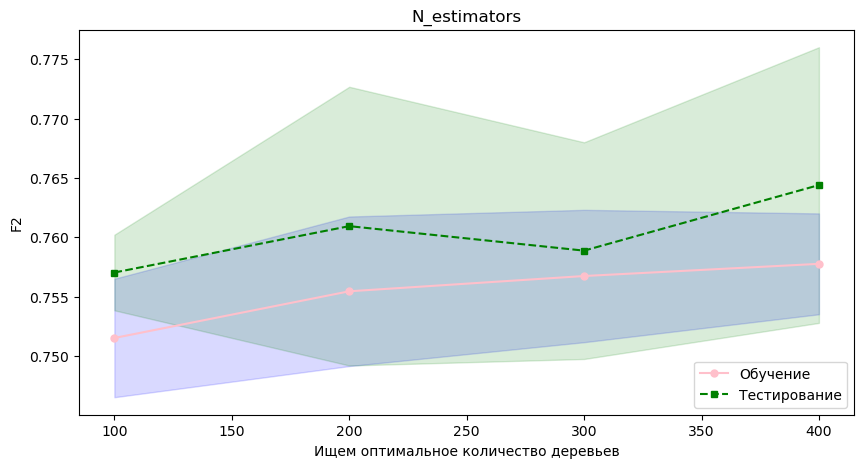

In [35]:
# Подбираем кол-во estimator , чем больше тем лучше, но слишком много тоже не нужно, поищем когда уменьшится улучшение модели
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
n_estimators = np.arange(100,500,100)
scores_train = []
scores_test = []
for i in n_estimators:
    lasso = Pipeline([ ('preprocessing', CT), ('regression', RandomForestClassifier(n_estimators=i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=cross_val, scoring=f2_scorer))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=cross_val, scoring=f2_scorer))

#Это позволяет визуализировать, как меняется стабильность модели с изменением количества деревьев.
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('N_estimators')
plt.plot(n_estimators, train_mean, color='pink', marker='o', markersize=5, label='Обучение')
plt.fill_between(n_estimators, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(n_estimators, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(n_estimators, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество деревьев')
plt.ylabel('F2')
plt.legend(loc='lower right')
plt.show()

2. ищем оптимальную глубину деревьев
нам нужна точка, в которой метрика на тесте начнет падать, несмотря на рост на обучении.
судя по всему это точка 8.

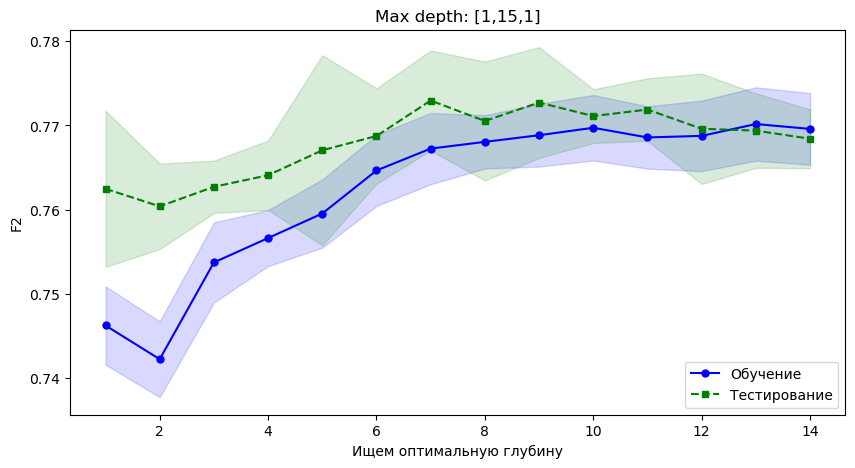

In [36]:
# max_depth

max_depth = np.arange(1,15,1)
scores_train = []
scores_test = []
for i in max_depth:
    lasso = Pipeline([ ('preprocessing', CT), ('regression', RandomForestClassifier(n_estimators=100, max_depth = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring=f2_scorer))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring=f2_scorer))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max depth: [1,15,1]')
plt.plot(max_depth, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_depth, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальную глубину')
plt.ylabel('F2')
plt.legend(loc='lower right')
plt.show()

3.Подбираем количество фич, используемое для обучения одного пенька. нам нужно такое количество фич, которое покажет хорошие результаты на тесте и не даст переобучения.      
и вот тут я вижу проблему: оптимальное количество фич где-то в районе 0.2, что значит, что большая часть фич в целом мешают обучению, а не способствуют ему...



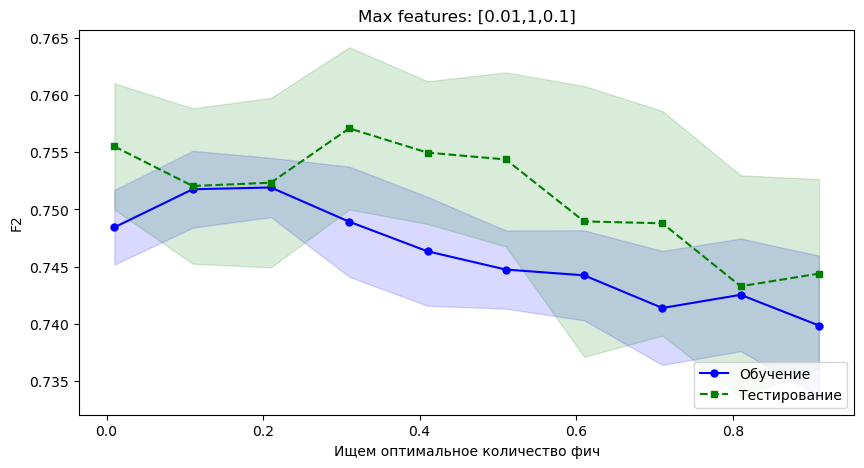

In [37]:

max_features = np.arange(0.01,1,0.1)
scores_train = []
scores_test = []
for i in max_features:
    lasso = Pipeline([ ('preprocessing', CT), ('regression', RandomForestClassifier(n_estimators=100, max_features = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring=f2_scorer))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring=f2_scorer))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max features: [0.01,1,0.1]')
plt.plot(max_features, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_features, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_features, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_features, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество фич')
plt.ylabel('F2')
plt.legend(loc='lower right')
plt.show()

4. Подбираем минимальное количество выборок для узла min_samples_leaf 

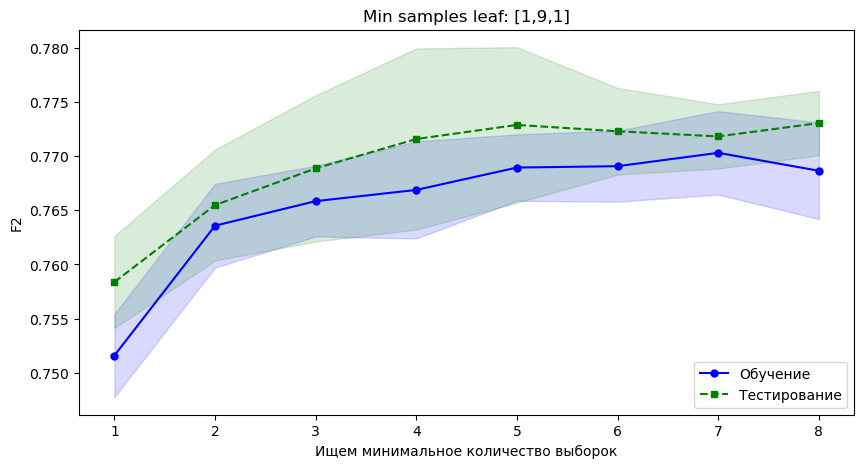

In [38]:

min_samples_leaf = np.arange(1,9,1)
scores_train = []
scores_test = []
for i in min_samples_leaf:
    lasso = Pipeline([ ('preprocessing', CT), ('regression', RandomForestClassifier(n_estimators=100, min_samples_leaf = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring=f2_scorer))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring=f2_scorer))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Min samples leaf: [1,9,1]')
plt.plot(min_samples_leaf, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(min_samples_leaf, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(min_samples_leaf, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(min_samples_leaf, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем минимальное количество выборок')
plt.ylabel('F2')
plt.legend(loc='lower right')
plt.show()

5.  Подбираем кол-во максимальной выборки max_samples       
max_samples - ограничивает максимальный размер подвыборки для каждого из деревьев в случайном лесе 


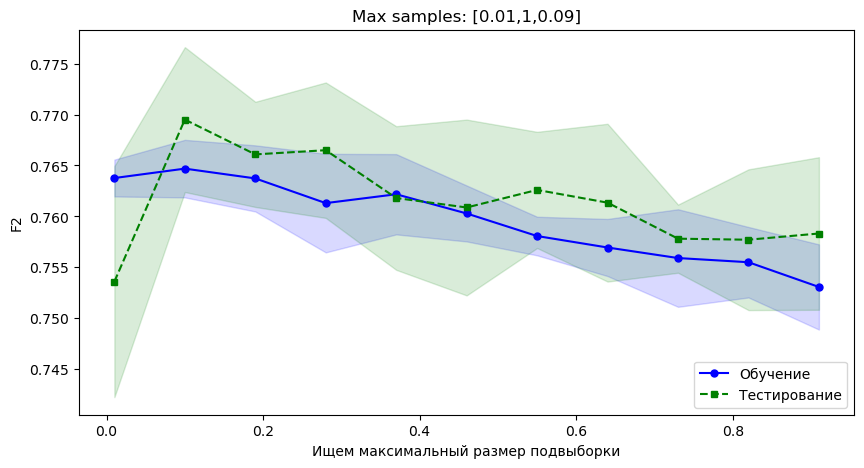

In [39]:
# Подбираем кол-во максимальной выборки max_samples
max_samples = np.arange(0.01,1,0.09)
scores_train = []
scores_test = []
for i in max_samples:
    lasso = Pipeline([('preprocessing', CT), ('regression', RandomForestClassifier(n_estimators=100, max_samples = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5),scoring=f2_scorer))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5),scoring=f2_scorer))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max samples: [0.01,1,0.09]')
plt.plot(max_samples, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_samples, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_samples, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_samples, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем максимальный размер подвыборки')
plt.ylabel('F2')
plt.legend(loc='lower right')
plt.show()

In [127]:
rf_1= Pipeline([
#    ('preprocessing', CT),
                ('classifier',RandomForestClassifier(n_jobs = -1, n_estimators = 290, 
                                                                           #max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.6,
                                                   max_features = 0.2,
                                                class_weight={0: 1, 1: 2}) )]) 
rf_1.fit(X_train, y_train)
# Предсказания
y_train_pred = rf_1.predict(X_train)
y_test_pred_RFC = rf_1.predict(X_test)

# Вычисление F2-Score
f2_train = fbeta_score(y_train, y_train_pred, beta=2**0.5)
f2_test = fbeta_score(y_test, y_test_pred_RFC, beta=2**0.5)

print('F2-Score на обучающем наборе: {:.3f}'.format(f2_train))
print('F2-Score на тестовом наборе: {:.3f}'.format(f2_test))

F2-Score на обучающем наборе: 0.850
F2-Score на тестовом наборе: 0.813


In [128]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("RandomForestClassifier")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_test_pred_RFC))
models_evalutions['Recall'].append(recall_score(y_test, y_test_pred_RFC))
models_evalutions['Precision'].append(precision_score(y_test, y_test_pred_RFC))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_test_pred_RFC, beta=2**0.5))

In [106]:
print(models_evalutions)

{'Model': ['RandomForestClassifier', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'VotingClassifier', 'Stacking Classifier', 'KNeighborsClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'Stacking Classifier', 'HistGradientBoostingClassifier', 'RandomForestClassifier'], 'Accuracy': [0.742808072133963, 0.7502146844139116, 0.736152855302705, 0.7388364104765994, 0.7379776728209532, 0.7210176041219407, 0.6679905538857879, 0.7118935165306999, 0.7358308286818377, 0.736152855302705, 0.7141477028767711], 'Precision': [0.6926694777813818, 0.7403184588165913, 0.6819754639823844, 0.6865528792470889, 0.6855596242636522, 0.7114224557306869, 0.609638239519394, 0.7095543958249699, 0.683383589906364, 0.6819754639823844, 0.6527154236060826], 'Recall': [0.8950125733445097, 0.78918692372171, 0.9086336965632859, 0.9019279128248114, 0.902347024308466, 0.7661357921207042, 0.9782062028499581, 0.7407795473595976, 0.902347024308466, 0.9086336965632859, 0.9444677284157585], 'F2 scor

In [42]:

pipe = Pipeline([
#    ('preprocessing', CT),
    ('classifier', RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.5,
                                                   max_features = 0.2))
])

# Кросс-валидация с F2-Score
cv_results = cross_validate(
    pipe, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=f2_scorer,  
    n_jobs=-1
)

cv_list = cv_results['test_score']
print(cv_list)

[0.766465   0.77503441 0.76638743 0.7699914  0.77309771]


#### GradientBoosting

1. GradientBoostingClassifier 

решетками мы пользоваться не можем, поэтому идем рисовать графики!         
(код для графиков стащила из семинара наглейшим образом)

**learning_rate** (скорость обучения): уменьшает вклад каждого дерева в итоговый предсказатель. Чем ниже значение, тем медленнее будет происходить обучение (меньше "шум").        
**subsample**: доля случайных данных, которые будут использоваться для тренировки каждого дерева. Значение 1.0 означает, что используется вся выборка.

1. смотрим на "базу" - logloss. нам нужна минимизация ошибки на тесте, этому запросу лучше всего отвечает модель 3 (линия желтая)

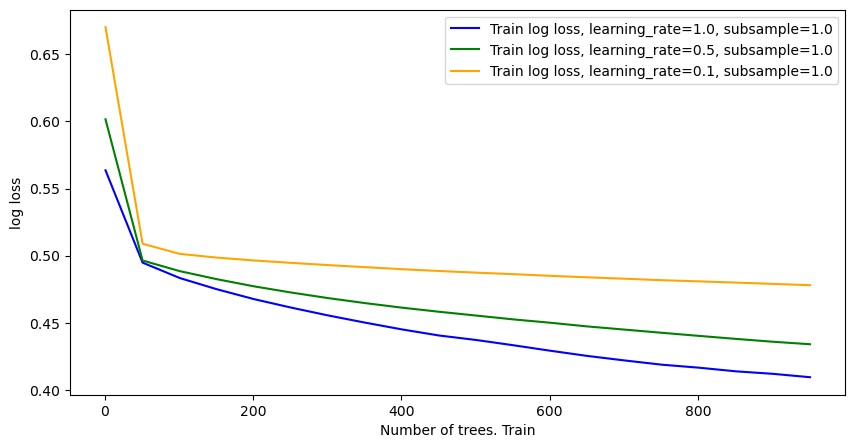

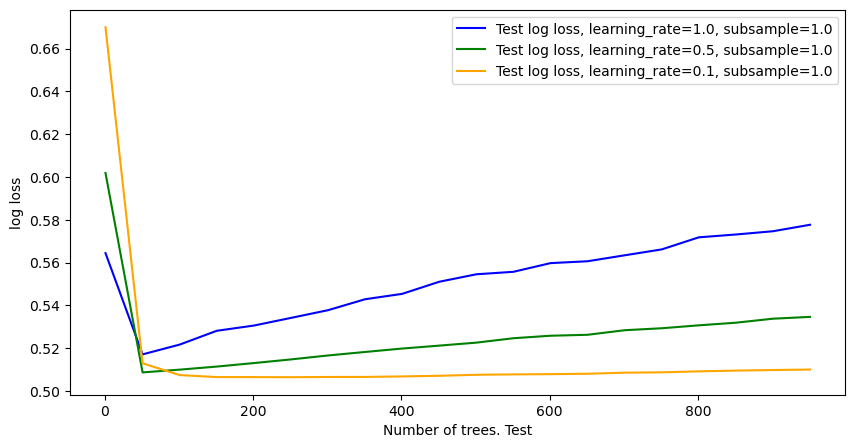

In [43]:
# Задаем параметры моделей
params1 = {'learning_rate': 1.0, 'subsample': 1.0}
params2 = {'learning_rate': 0.5, 'subsample': 1.0}
params3 = {'learning_rate': 0.1, 'subsample': 1.0}

# Инициализируем модели
clf1 = GradientBoostingClassifier(**params1)
clf2 = GradientBoostingClassifier(**params2)
clf3 = GradientBoostingClassifier(**params3)

# Обучаем модели на train данных и сохраняем ошибки на train и test данных
train_errors1, test_errors1 = [], []
train_errors2, test_errors2 = [], []
train_errors3, test_errors3 = [], []
for n in range(1, 1000, 50):
    
    clf1 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params1, random_state=42, n_estimators = n))])
        
    clf2 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params2, random_state=42, n_estimators = n))])
        
    clf3 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params3, random_state=42, n_estimators = n))])
    
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    y_train_pred1 = clf1.predict_proba(X_train)
    y_test_pred1 = clf1.predict_proba(X_test)
    y_train_pred2 = clf2.predict_proba(X_train)
    y_test_pred2 = clf2.predict_proba(X_test)
    y_train_pred3 = clf3.predict_proba(X_train)
    y_test_pred3 = clf3.predict_proba(X_test)
    train_errors1.append(log_loss(y_train, y_train_pred1))
    test_errors1.append(log_loss(y_test, y_test_pred1))
    train_errors2.append(log_loss(y_train, y_train_pred2))
    test_errors2.append(log_loss(y_test, y_test_pred2))
    train_errors3.append(log_loss(y_train, y_train_pred3))
    test_errors3.append(log_loss(y_test, y_test_pred3))

# Строим график log loss на train и test данных для каждой модели
plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), train_errors1, label='Train log loss, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), train_errors2, label='Train log loss, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), train_errors3, label='Train log loss, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Train')
plt.ylabel('log loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), test_errors1, label='Test log loss, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), test_errors2, label='Test log loss, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), test_errors3, label='Test log loss, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Test')
plt.ylabel('log loss')
plt.legend()
plt.show()

тут смотрим на F2 - score, т.е. нам нужна максимизация F2, и лучше всего опять же желтая линия.

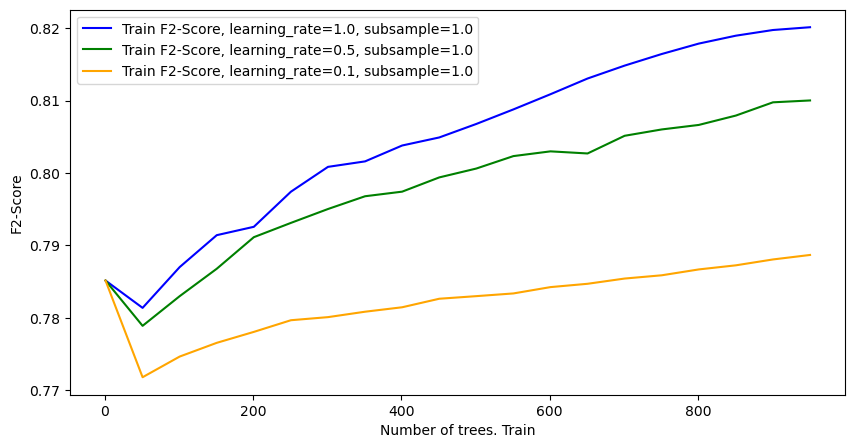

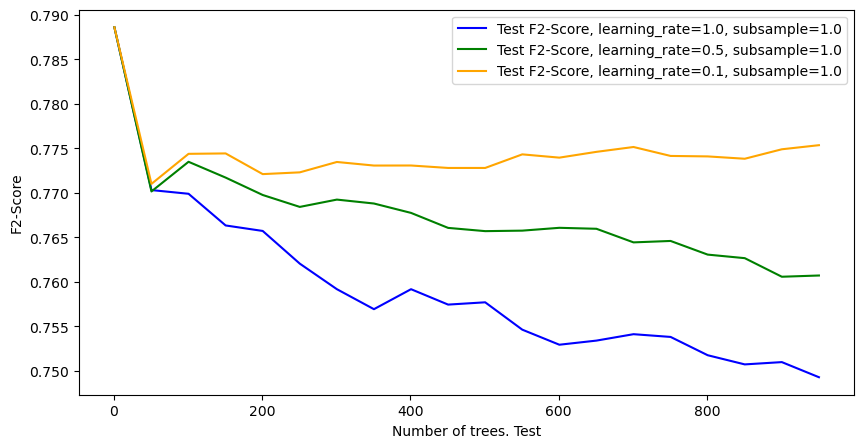

In [44]:
# Создаем scorer для F2-Score
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)

# Задаем параметры моделей
params1 = {'learning_rate': 1.0, 'subsample': 1.0}
params2 = {'learning_rate': 0.5, 'subsample': 1.0}
params3 = {'learning_rate': 0.1, 'subsample': 1.0}

# Списки для ошибок
train_errors1, test_errors1 = [], []
train_errors2, test_errors2 = [], []
train_errors3, test_errors3 = [], []

# Обучаем модели и вычисляем F2-Score для каждой модели
for n in range(1, 1000, 50):
    
    clf1 = Pipeline([('preprocessing', CT),
                     ('classifier', GradientBoostingClassifier(**params1, n_estimators=n))])
    clf2 = Pipeline([('preprocessing', CT),
                     ('classifier', GradientBoostingClassifier(**params2, n_estimators=n))])
    clf3 = Pipeline([('preprocessing', CT),
                     ('classifier', GradientBoostingClassifier(**params3, n_estimators=n))])
    
    # Обучение моделей
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    
    # Получаем предсказания (по вероятностям)
    y_train_pred1 = clf1.predict(X_train)
    y_test_pred1 = clf1.predict(X_test)
    y_train_pred2 = clf2.predict(X_train)
    y_test_pred2 = clf2.predict(X_test)
    y_train_pred3 = clf3.predict(X_train)
    y_test_pred3 = clf3.predict(X_test)

    # Вычисляем F2-Score
    train_errors1.append(fbeta_score(y_train, y_train_pred1, beta=2**0.5))
    test_errors1.append(fbeta_score(y_test, y_test_pred1, beta=2**0.5))
    train_errors2.append(fbeta_score(y_train, y_train_pred2, beta=2**0.5))
    test_errors2.append(fbeta_score(y_test, y_test_pred2, beta=2**0.5))
    train_errors3.append(fbeta_score(y_train, y_train_pred3, beta=2**0.5))
    test_errors3.append(fbeta_score(y_test, y_test_pred3, beta=2**0.5))

# Строим график F2-Score на train и test данных для каждой модели
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1000, 50), train_errors1, label='Train F2-Score, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000, 50), train_errors2, label='Train F2-Score, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000, 50), train_errors3, label='Train F2-Score, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Train')
plt.ylabel('F2-Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 1000, 50), test_errors1, label='Test F2-Score, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000, 50), test_errors2, label='Test F2-Score, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000, 50), test_errors3, label='Test F2-Score, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Test')
plt.ylabel('F2-Score')
plt.legend()
plt.show()

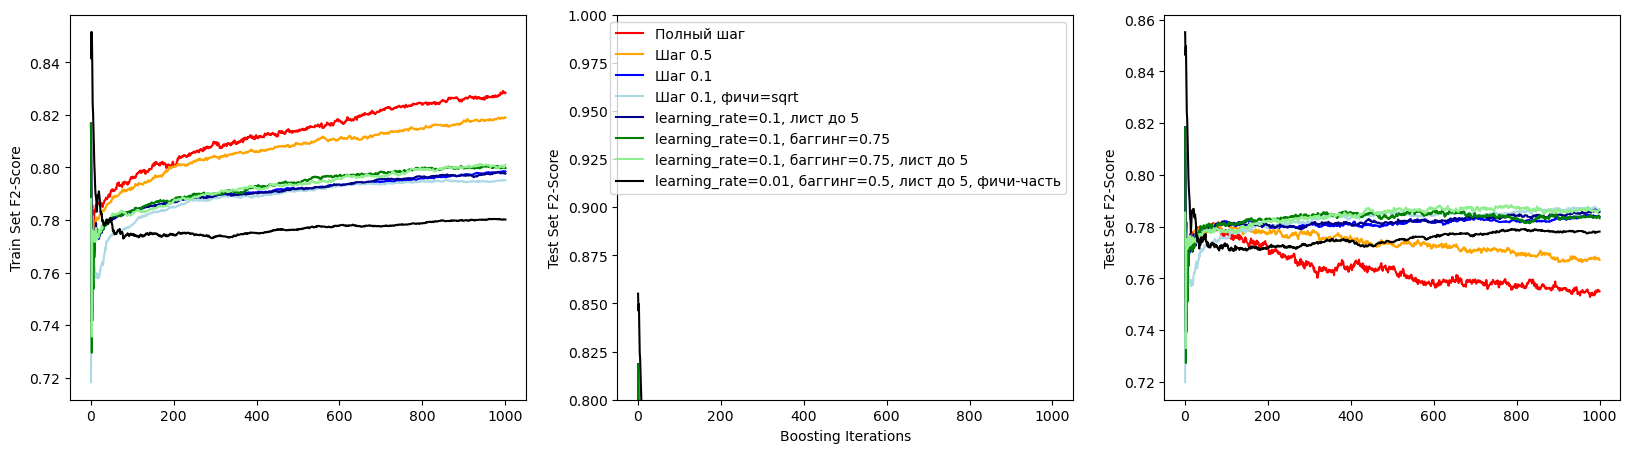

In [45]:
labels, y = np.unique(y, return_inverse=True)

# Параметры модели
original_params = {
    "n_estimators": 1000,
    'criterion': 'friedman_mse'
}

# Подготовка графиков
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Итерация по различным настройкам
for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt", "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'}),
    ("learning_rate=0.1, лист до 5", "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split": 5}),
    ("learning_rate=0.1, баггинг=0.75", "green", {"learning_rate": 0.1, "subsample": 0.75}),
    ("learning_rate=0.1, баггинг=0.75, лист до 5", "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split": 5}),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть", "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split": 5, "max_features": 'sqrt'}),
]:
    params = dict(original_params)
    params.update(setting)

    clf = Pipeline([('preprocessing', CT),
                    ('classifier', GradientBoostingClassifier(**params))])

    clf.fit(X_train, y_train)

    # Вычисление F2-Score для обучающей выборки
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    X_train_for_proba = CT.fit_transform(X_train)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_train_for_proba)):
        train_deviance[i] = fbeta_score(y_train, y_pred.argmax(axis=1), beta=2)  # Используем fbeta_score для F2

    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    # Вычисление F2-Score для тестовой выборки
    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    X_test_for_proba = CT.transform(X_test)
    for i, y_pred in enumerate(clf['classifier'].staged_predict(X_test_for_proba)):
        test_score[i] = fbeta_score(y_test, y_pred, beta=2)  # Используем fbeta_score для F2

    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )

    # Вычисление F2-Score для тестовой выборки по вероятностям
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_test_for_proba)):
        test_deviance[i] = fbeta_score(y_test, y_pred.argmax(axis=1), beta=2)  # Используем fbeta_score для F2

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

# Настройка и вывод графиков
ax2.legend(loc='best')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set F2-Score")
ax2.set_ylabel("Test Set F2-Score")
ax3.set_ylabel("Test Set F2-Score")

plt.show()

In [46]:
# Черная линия без фичинга 
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])
gbc.fit(X_train, y_train)
# Получение предсказаний классов (для метрики f2_score)
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Вычисление F2-Score
train_f2 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2 = fbeta_score(y_test, y_test_pred, beta=2**0.5)

# Вывод результатов
display(f'F2-Score на обучающем наборе: {train_f2:.3f}')
display(f'F2-Score на тестовом наборе: {test_f2:.3f}')

'F2-Score на обучающем наборе: 0.772'

'F2-Score на тестовом наборе: 0.771'

In [47]:
# Синяя линия без фичинга
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
gbc.fit(X_train, y_train)
# Получение предсказаний классов (для метрики f2_score)
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Вычисление F2-Score
train_f2 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2 = fbeta_score(y_test, y_test_pred, beta=2**0.5)

# Вывод результатов
display(f'F2-Score на обучающем наборе: {train_f2:.3f}')
display(f'F2-Score на тестовом наборе: {test_f2:.3f}')

'F2-Score на обучающем наборе: 0.775'

'F2-Score на тестовом наборе: 0.774'

In [48]:
# Голубая линия без фичинга
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X_train, y_train)
# Получение предсказаний классов (для метрики f2_score)
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Вычисление F2-Score
train_f2 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2 = fbeta_score(y_test, y_test_pred, beta=2**0.5)

# Вывод результатов
display(f'F2-Score на обучающем наборе: {train_f2:.3f}')
display(f'F2-Score на тестовом наборе: {test_f2:.3f}')

'F2-Score на обучающем наборе: 0.774'

'F2-Score на тестовом наборе: 0.770'

ну собственно самая адекватная судя по всему синяя, выделим её

In [40]:
# Синяя линия без фичинга
gbc = Pipeline([
    ('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
gbc.fit(X_train, y_train)
# Получение предсказаний классов (для метрики f2_score)
y_train_pred = gbc.predict(X_train)
y_test_pred_GBC = gbc.predict(X_test)

# Вычисление F2-Score
train_f2 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2 = fbeta_score(y_test, y_test_pred_GBC, beta=2**0.5)

# Вывод результатов
display(f'F2-Score на обучающем наборе: {train_f2:.3f}')
display(f'F2-Score на тестовом наборе: {test_f2:.3f}')

'F2-Score на обучающем наборе: 0.775'

'F2-Score на тестовом наборе: 0.772'

In [41]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("GradientBoostingClassifier")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_test_pred_GBC))
models_evalutions['Recall'].append(recall_score(y_test, y_test_pred_GBC))
models_evalutions['Precision'].append(precision_score(y_test, y_test_pred_GBC))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_test_pred_GBC, beta=2**0.5))

#### 2. HistGradientBoostingClassifier

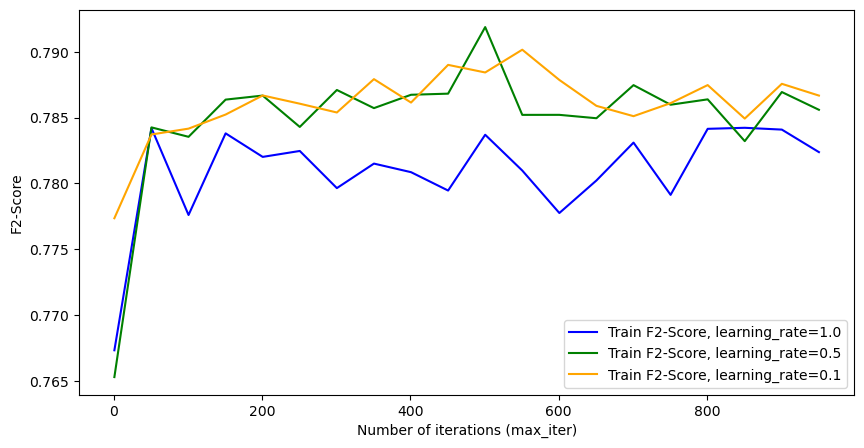

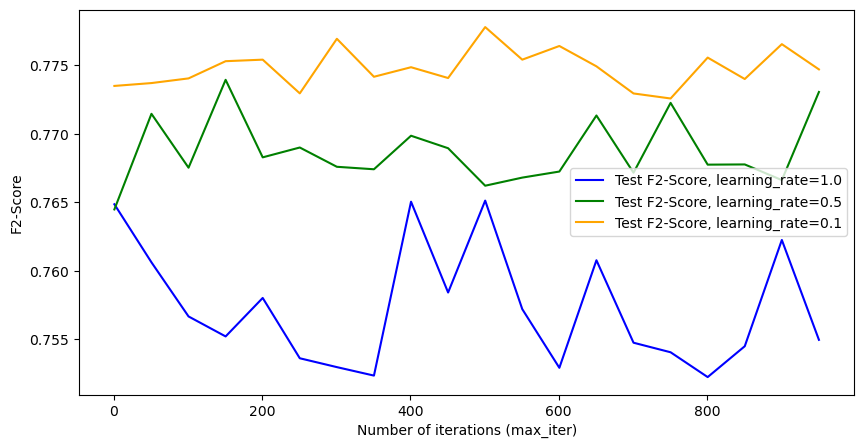

In [107]:
# Списки для ошибок
train_errors1, test_errors1 = [], []
train_errors2, test_errors2 = [], []
train_errors3, test_errors3 = [], []

# Параметры моделей
params1 = {'learning_rate': 1.0}  
params2 = {'learning_rate': 0.5}
params3 = {'learning_rate': 0.1}

# Обучаем модели и вычисляем F2-Score для каждой модели
for n in range(1, 1000, 50):
    clf1 = Pipeline([
        ('preprocessing', CT),
        ('classifier', HistGradientBoostingClassifier(**params1, max_iter=n))
    ])
    clf2 = Pipeline([
        ('preprocessing', CT),
        ('classifier', HistGradientBoostingClassifier(**params2, max_iter=n))
    ])
    clf3 = Pipeline([
        ('preprocessing', CT),
        ('classifier', HistGradientBoostingClassifier(**params3, max_iter=n))
    ])
    
    # Обучение моделей
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    
    # Получаем предсказания
    y_train_pred1 = clf1.predict(X_train)
    y_test_pred1 = clf1.predict(X_test)
    y_train_pred2 = clf2.predict(X_train)
    y_test_pred2 = clf2.predict(X_test)
    y_train_pred3 = clf3.predict(X_train)
    y_test_pred3 = clf3.predict(X_test)
    
    # Вычисляем F2-Score
    train_errors1.append(fbeta_score(y_train, y_train_pred1, beta=2**0.5))
    test_errors1.append(fbeta_score(y_test, y_test_pred1, beta=2**0.5))
    train_errors2.append(fbeta_score(y_train, y_train_pred2, beta=2**0.5))
    test_errors2.append(fbeta_score(y_test, y_test_pred2, beta=2**0.5))
    train_errors3.append(fbeta_score(y_train, y_train_pred3, beta=2**0.5))
    test_errors3.append(fbeta_score(y_test, y_test_pred3, beta=2**0.5))

# Строим график F2-Score на train и test данных для каждой модели
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1000, 50), train_errors1, label='Train F2-Score, learning_rate=1.0', color='blue')
plt.plot(range(1, 1000, 50), train_errors2, label='Train F2-Score, learning_rate=0.5', color='green')
plt.plot(range(1, 1000, 50), train_errors3, label='Train F2-Score, learning_rate=0.1', color='orange')
plt.xlabel('Number of iterations (max_iter)')
plt.ylabel('F2-Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 1000, 50), test_errors1, label='Test F2-Score, learning_rate=1.0', color='blue')
plt.plot(range(1, 1000, 50), test_errors2, label='Test F2-Score, learning_rate=0.5', color='green')
plt.plot(range(1, 1000, 50), test_errors3, label='Test F2-Score, learning_rate=0.1', color='orange')
plt.xlabel('Number of iterations (max_iter)')
plt.ylabel('F2-Score')
plt.legend()
plt.show()


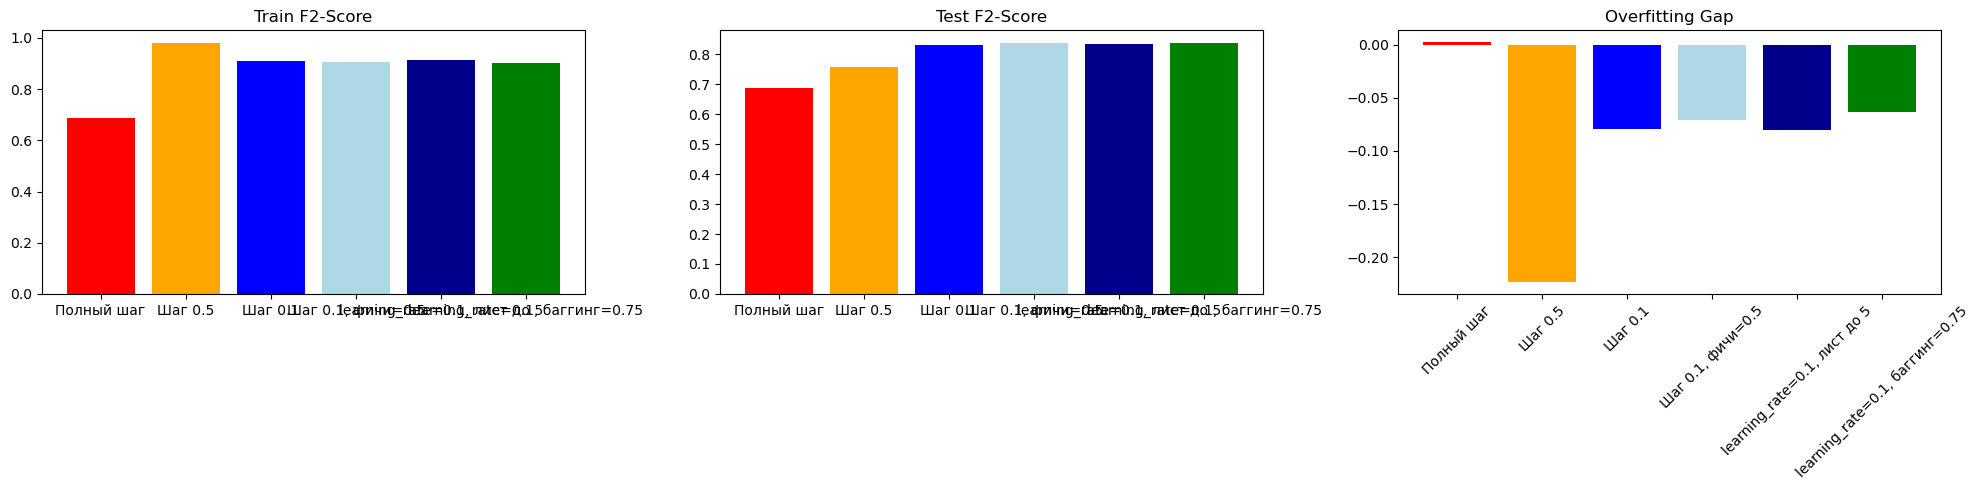

In [117]:
# Параметры модели
original_params = {
    "max_iter": 1000,
    "early_stopping": False,
    "validation_fraction": 0.1,
    "random_state": 42,
    "scoring": make_scorer(fbeta_score, beta=2),
    "class_weight": {0: 1, 1: 2}
}

# Подготовка графиков
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Итерация по различным настройкам
for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5}),
    ("Шаг 0.1", "blue", {"learning_rate": 0.1}),
    ("Шаг 0.1, фичи=0.5", "lightblue", {"learning_rate": 0.1, "max_features": 0.5}),
    ("learning_rate=0.1, лист до 5", "darkblue", {"learning_rate": 0.1, "min_samples_leaf": 5}),
    ("learning_rate=0.1, баггинг=0.75", "green", {"learning_rate": 0.1, "l2_regularization": 1}),
]:
    params = original_params.copy()
    params.update(setting)

    # Обучение модели
    clf = Pipeline([
        ('preprocessing', CT),
        ('classifier', HistGradientBoostingClassifier(**params))
    ])
    clf.fit(X_train, y_train)

    # Получение F2-Score
    train_score = fbeta_score(y_train, clf.predict(X_train), beta=2)
    test_score = fbeta_score(y_test, clf.predict(X_test), beta=2)

    ax[0].bar(label, train_score, color=color)
    ax[1].bar(label, test_score, color=color)
    ax[2].bar(label, test_score - train_score, color=color)

# Настройка и вывод графиков
ax[0].set_title("Train F2-Score")
ax[1].set_title("Test F2-Score")
ax[2].set_title("Overfitting Gap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [107]:
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 4},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf": 5
}

clf = Pipeline([
    ('preprocessing', CT), 
    ('classifier', HistGradientBoostingClassifier(**params))
])

clf.fit(X_train, y_train)

# Предсказания для тренировочного и тестового наборов
y_train_pred_hist = clf.predict(X_train)
y_test_pred_hist = clf.predict(X_test)

# Оценка F2-Score для тренировочного и тестового наборов
train_score = fbeta_score(y_train, y_train_pred_hist, beta=2**0.5)
test_score = fbeta_score(y_test, y_test_pred_hist, beta=2**0.5)

print(f"Train F2-Score: {train_score}")
print(f"Test F2-Score: {test_score}")


Train F2-Score: 0.8202628614344725
Test F2-Score: 0.8197881960970967


In [108]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("HistGradientBoostingClassifier")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_test_pred_hist))
models_evalutions['Recall'].append(recall_score(y_test, y_test_pred_hist))
models_evalutions['Precision'].append(precision_score(y_test, y_test_pred_hist))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_test_pred_hist, beta=2**0.5))

### посмотрим зависимости фич

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier())])
gbc.fit(X_train, y_train)
# Получение предсказаний классов (для метрики f2_score)
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Вычисление F2-Score
train_f2 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2 = fbeta_score(y_test, y_test_pred, beta=2**0.5)

# Вывод результатов
display(f'F2-Score на обучающем наборе: {train_f2:.3f}')
display(f'F2-Score на тестовом наборе: {test_f2:.3f}')
gbc['classifier'].feature_importances_

'F2-Score на обучающем наборе: 0.775'

'F2-Score на тестовом наборе: 0.774'

array([3.34512194e-01, 6.33998177e-02, 1.02672048e-02, 1.29099955e-01,
       1.16452653e-03, 1.51749205e-03, 1.57286966e-02, 1.44437658e-04,
       5.86884340e-04, 4.04928792e-04, 1.17540974e-02, 3.53452481e-04,
       2.32434037e-04, 2.88122204e-01, 2.46729926e-03, 1.69487830e-03,
       9.61295141e-03, 7.99376759e-03, 1.07554732e-01, 2.46506821e-03,
       1.09229775e-02])

как я и думала выше, значительная часть признаков не являются важными, а шум в данных создают...

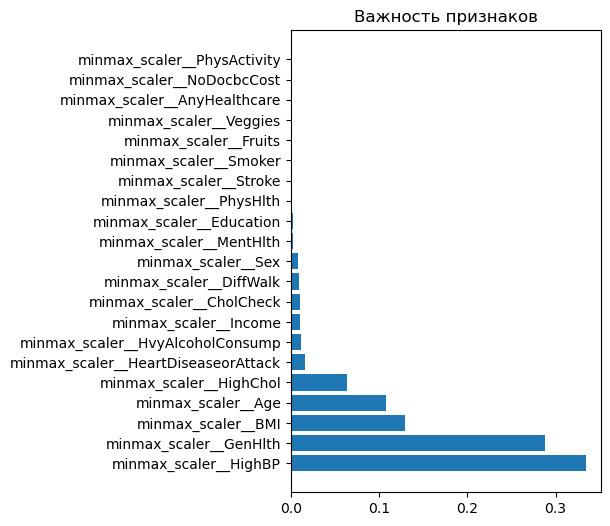

In [52]:
importance = np.sort(gbc['classifier'].feature_importances_)
importance_name = np.argsort(gbc['classifier'].feature_importances_)
feature_names = CT.get_feature_names_out()

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()


In [53]:
# Сортируем важности признаков
importance = np.sort(gbc['classifier'].feature_importances_)[::-1]  # Сортировка по убыванию
importance_name = np.argsort(gbc['classifier'].feature_importances_)[::-1]  # Индексы сортировки

# Получаем имена признаков
feature_names = CT.get_feature_names_out()

# Установим порог для важности признаков или выберем N лучших
n_top_features = 10  # Количество лучших признаков для выбора

# Получаем имена признаков, которые следует оставить
selected_features = feature_names[importance_name[:n_top_features]]  # Выбираем топ-N признаков

# Создаем новый ColumnTransformer, который будет только с важными признаками
# Предположим, что CT - это ColumnTransformer, который применяет разные трансформации
# к разным признакам. Мы теперь будем использовать только выбранные признаки.
selected_features


array(['minmax_scaler__HighBP', 'minmax_scaler__GenHlth',
       'minmax_scaler__BMI', 'minmax_scaler__Age',
       'minmax_scaler__HighChol', 'minmax_scaler__HeartDiseaseorAttack',
       'minmax_scaler__HvyAlcoholConsump', 'minmax_scaler__Income',
       'minmax_scaler__CholCheck', 'minmax_scaler__DiffWalk'],
      dtype=object)

### voiting

"Идея VotingRegressor заключается в объединении концептуально разных регрессионых моделей машинного обучения и возвращении средних прогнозируемых значений."

модели для ансамбля я выбирала из уже построенных мною моделей с подобранными параметрами. отобрала три лучшие, затем построила.

1. hard

"При жестком голосовании прогнозируемая метка класса для конкретной выборки представляет собой метку класса, которая определяется большинством меток классов, предсказанных каждым отдельным классификатором."

In [ ]:
# Определяем F2-Score в качестве метрики
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)

# Определяем F2-Score в качестве метрики
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf" : 5
}
# тут задаем модельки, которые в voiting участвуют
clf1 = Pipeline([('preprocessing', CT),
                 ('classifier', HistGradientBoostingClassifier(**params))])
clf2 = Pipeline([('preprocessing', CT),
                 ('classifier', LogisticRegression(C=2, penalty = 'l2', solver= 'liblinear'))]) 

clf3 = Pipeline([('preprocessing', CT),
                 ('classifier', RandomForestClassifier(n_jobs = -1, n_estimators = 250, 
                                                       #max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.5,
                                                   max_features = 0.2,
                                                       class_weight={0: 1, 1: 2}))]) 

# Ансамбль
eclf = VotingClassifier(
    estimators=[('gb', clf1), ('lr', clf2), ('rf', clf3)],
    voting='hard')

# Оценка моделей с использованием F2-Score
for clf, label in zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring=f2_scorer, cv=5)
    print("F2-Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Строим матрицы ошибок для каждой модели и ансамбля
f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, (clf, label) in enumerate(zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                                 'Random Forest', 'Ensemble'])):
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['0', '1'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()  # Убираем цветовую шкалу

plt.tight_layout()
plt.show()

2. soft

"В отличие от голосования большинством (жесткое голосование), мягкое голосование возвращает метку класса как суммы предсказанных вероятностей.
Каждому классификатору можно присвоить определенные веса с помощью параметра веса. При указании весов прогнозируемые вероятности классов для каждого классификатора собираются, умножаются на вес классификатора и усредняются. Затем окончательная метка класса получается из метки класса с наибольшей средней вероятностью."

In [ ]:
# Определяем F2-Score в качестве метрики
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf" : 5
}
# тут задаем модельки, которые в voiting участвуют
clf1 = Pipeline([('preprocessing', CT),
                 ('classifier', HistGradientBoostingClassifier(**params))])
clf2 = Pipeline([('preprocessing', CT),
                 ('classifier', LogisticRegression(C=2, penalty = 'l2', solver= 'liblinear'))]) 

clf3 = Pipeline([('preprocessing', CT),
                 ('classifier', RandomForestClassifier(n_jobs = -1, n_estimators = 250, 
                                                       #max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.5,
                                                   max_features = 0.2,
                                                       class_weight={0: 1, 1: 2}))]) 

# Ансамбль
eclf = VotingClassifier(
    estimators=[('gb', clf1), ('lr', clf2), ('rf', clf3)],
    voting='soft')

# Оценка моделей с использованием F2-Score
for clf, label in zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring=f2_scorer, cv=5)
    print("F2-Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Строим матрицы ошибок для каждой модели и ансамбля
f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, (clf, label) in enumerate(zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                                 'Random Forest', 'Ensemble'])):
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['0', '1'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()  # Убираем цветовую шкалу

plt.tight_layout()
plt.show()

F2-Score: 0.81 (+/- 0.00) [Gradient Boosting]
F2-Score: 0.76 (+/- 0.00) [Logistic Regression]
F2-Score: 0.81 (+/- 0.00) [Random Forest]


в нашем случае hard дает метрику чуть выше, берем его.

In [49]:
# Инициализация моделей
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf" : 5
}
c1 = HistGradientBoostingClassifier(**params)
c2 = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2},C=10, penalty = 'l1')
c3 = RandomForestClassifier(n_jobs = -1, n_estimators = 250, 
                                                       #max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.5,
                                                   max_features = 0.2,
                                                       class_weight={0: 1, 1: 2})

# Создание пайплайна с VotingClassifier
pipe_hard = Pipeline([('preprocessing', CT), 
                      ('classifier', VotingClassifier(estimators=[('gb', c1), ('lr', c2), ('rf', c3)], 
                                                      voting='hard'))])

# Обучаем модель
pipe_hard.fit(X_train, y_train)
# Предсказания на обучающих и тестовых данных
y_pred_train_voiting = pipe_hard.predict(X_train)
y_pred_test_voiting = pipe_hard.predict(X_test)


# Используем F2 для оценки на обучающих и тестовых данных
train_f2 = fbeta_score(y_train, pipe_hard.predict(X_train), beta=2**0.5)
test_f2 = fbeta_score(y_test, pipe_hard.predict(X_test), beta=2**0.5)

display(f'F2 score на обучающих данных: {train_f2:.3f}')
display(f'F2 score на тестовых данных: {test_f2:.3f}')

'F2 score на обучающих данных: 0.828'

'F2 score на тестовых данных: 0.817'

In [50]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("VotingClassifier")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_test_voiting))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_test_voiting))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_test_voiting))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_test_voiting, beta=2**0.5))

In [122]:
# Создание модели GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 100, max_features = 'sqrt'))])

# Обучение модели
gbc.fit(X_train, y_train)

# Предсказания на обучающих и тестовых данных
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

# Вычисление F2-метрики для обучающих и тестовых данных
f2_train = fbeta_score(y_train, y_pred_train, beta=2**0.5)
f2_test = fbeta_score(y_test, y_pred_test, beta=2**0.5)

# Вывод результатов
display(f'F2 на обучающей выборке: {f2_train:.3f}')
display(f'F2 на тестовой выборке: {f2_test:.3f}')

'F2 на обучающей выборке: 0.773'

'F2 на тестовой выборке: 0.773'

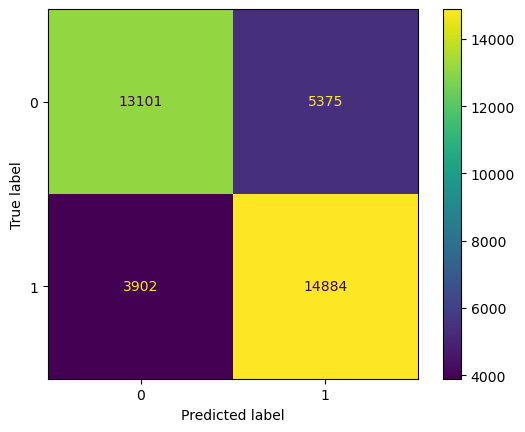

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train)).plot();

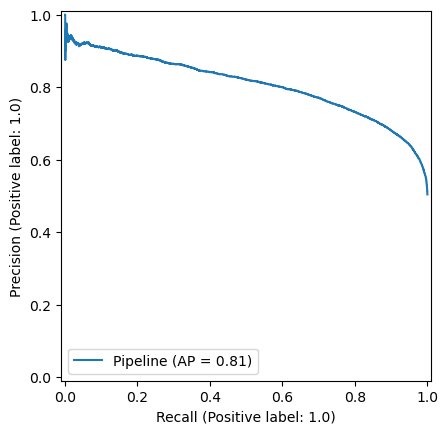

In [60]:
PrecisionRecallDisplay.from_estimator(gbc, X_train, y_train);

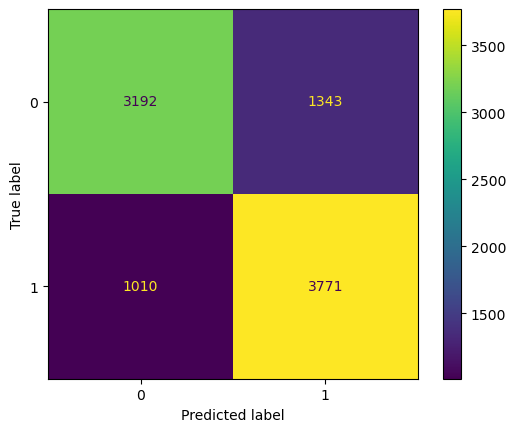

In [61]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot();

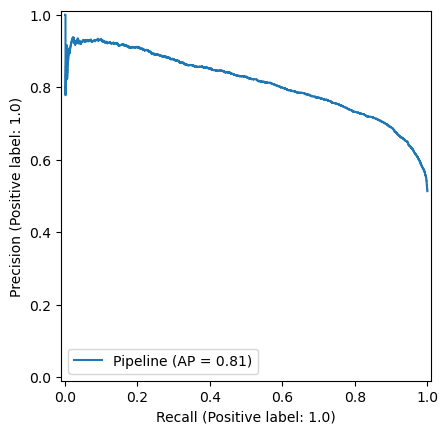

In [62]:
PrecisionRecallDisplay.from_estimator(gbc, X_test, y_test);


In [63]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     18476
         1.0       0.73      0.79      0.76     18786

    accuracy                           0.75     37262
   macro avg       0.75      0.75      0.75     37262
weighted avg       0.75      0.75      0.75     37262



#### Бэггинг на основе random forest classifier 


Бэггинг (Bootstrap Aggregating) — это метод ансамблирования, который используется для повышения точности     
классификации или регрессии путем объединения нескольких моделей. Основная идея бэггинга заключается в том,       
чтобы создать несколько подмножеств данных, обучить на каждом подмножестве отдельную модель,      
а затем усреднить или проголосовать для получения итогового предсказания.     

In [123]:
bag_model = BaggingClassifier(
     estimator = RandomForestClassifier(n_jobs = -1, n_estimators = 250, 
                                        #max_depth = 10, 
                                                                           min_samples_leaf = 4,
                                                                           max_samples =0.5,
                                                   max_features = 0.2,
                                       class_weight={0: 1, 1: 2}),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score=True,
    
)

In [124]:
bag_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                                   max_features=0.2,
                                                   max_samples=0.5,
                                                   min_samples_leaf=4,
                                                   n_estimators=250,
                                                   n_jobs=-1),
                  max_samples=0.8, n_estimators=100, oob_score=True)

In [125]:
bag_model.oob_score_

0.735467768772476

In [126]:

y_pred_bag = bag_model.predict(X_test)

# Рассчитываем F2-меру
f2 = fbeta_score(y_test, y_pred_bag, beta=2**0.5)

# Выводим F2-меру
print("F2 score:", f2)

F2 score: 0.8133138537762815


In [127]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("BaggingClassifier_randomforest")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_bag))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_bag))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_bag))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_bag, beta=2**0.5))

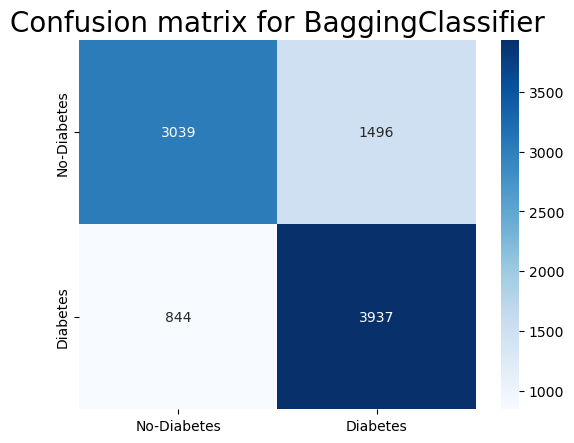

In [128]:
# plotting confusion mtrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for BaggingClassifier', fontsize = 20); # title with fontsize 20

#### Бэггинг на основе random HistGradientBoostingClassifier

In [ ]:
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 4},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf": 5
}



In [ ]:
bag_model = BaggingClassifier(
     estimator = HistGradientBoostingClassifier(**params),
    n_estimators = 10,
    max_samples = 0.5,
    oob_score=True,
    
)

In [ ]:
bag_model.fit(X_train, y_train)

In [ ]:
y_pred_bag_boo = bag_model.predict(X_test)

# Рассчитываем F2-меру
f2 = fbeta_score(y_test, y_pred_bag_boo, beta=2**0.5)

# Выводим F2-меру
print("F2 score:", f2)

In [ ]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("BaggingClassifier_boosting")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_bag_boo))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_bag_boo))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_bag_boo))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_bag_boo, beta=2**0.5))

#### StackingClassifier

"Стекинг — это метод объединения оценок для уменьшения их систематической ошибки. Точнее, прогнозы каждого отдельного оценщика сводятся в единую таблицу и используются в качестве входных данных для окончательного эстиматора для вычисления прогноза. Этот эстиматор может вычисляться на основе крос-валидационных решений перидущих эстиматоров." т.е. мы можем сделать некоторую надстройку над votitng. попробуем собрать эту конструкцию...

в качестве мета - модели будет voiting

пока LogisticRegression

F2-Score for Stacking Classifier: 0.81 (+/- 0.00)


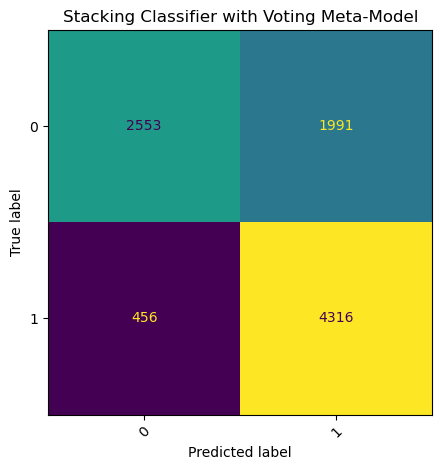

F2 score на обучающих данных: 0.822
F2 score на тестовых данных: 0.817


In [51]:

from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Инициализация моделей
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf": 5
}

# Базовые модели
c1 = HistGradientBoostingClassifier(**params)
c2 = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2}, C=10, penalty='l1')
c3 = RandomForestClassifier(n_jobs=-1, n_estimators=250, min_samples_leaf=4, max_samples=0.5,
                            max_features=0.2, class_weight={0: 1, 1: 2})

# Создание VotingClassifier для использования в качестве мета-модели
voting_clf = VotingClassifier(estimators=[('gb', c1), ('lr', c2), ('rf', c3)], voting='hard')

# Стейкинг: используем классификаторы первого уровня и VotingClassifier как мета-модель
stacking_clf = StackingClassifier(
    estimators=[('gb', c1), ('lr', c2), ('rf', c3)],
    final_estimator=voting_clf
)

# Оценка стейкинговой модели с использованием F2-Score и Stratified KFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2**0.5)
scores = cross_val_score(stacking_clf, X_train, y_train, scoring=f2_scorer, cv=cv)

# Выводим результаты
print(f"F2-Score for Stacking Classifier: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Строим матрицу ошибок для стейкинговой модели
y_pred = stacking_clf.fit(X_train, y_train).predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['0', '1'])
disp.plot(xticks_rotation=45)
disp.ax_.set_title('Stacking Classifier with Voting Meta-Model')
disp.im_.colorbar.remove()  # Убираем цветовую шкалу

plt.tight_layout()
plt.show()

# Оценка F2-Score на обучающих и тестовых данных
train_f2 = fbeta_score(y_train, stacking_clf.predict(X_train), beta=2**0.5)
test_f2 = fbeta_score(y_test, stacking_clf.predict(X_test), beta=2**0.5)

print(f'F2 score на обучающих данных: {train_f2:.3f}')
print(f'F2 score на тестовых данных: {test_f2:.3f}')


In [87]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Инициализация моделей
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf" : 5
}
c1 = HistGradientBoostingClassifier(**params)
c2 = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2}, C=10, penalty='l1')
c3 = RandomForestClassifier(n_jobs=-1, n_estimators=250, 
                            min_samples_leaf=4, max_samples=0.5, max_features=0.2, class_weight={0: 1, 1: 2})

# Создание VotingClassifier для использования в качестве мета-модели
voting_clf = VotingClassifier(estimators=[('gb', c1), ('lr', c2), ('rf', c3)], voting='soft')

# Создание StackingClassifier с мета-моделью, использующей VotingClassifier
stacking_clf = StackingClassifier(
    estimators=[('gb', c1), ('lr', c2), ('rf', c3)], 
    final_estimator=voting_clf
)

# Создание пайплайна с StackingClassifier
pipe_stacking = Pipeline([('preprocessing', CT), 
                          ('classifier', stacking_clf)])

# Обучаем модель
pipe_stacking.fit(X_train, y_train)

# Предсказания на обучающих и тестовых данных
y_pred_train_stacking = pipe_stacking.predict(X_train)
y_pred_test_stacking = pipe_stacking.predict(X_test)

# Используем F2 для оценки на обучающих и тестовых данных
train_f2_stacking = fbeta_score(y_train, y_pred_train_stacking, beta=2**0.5)
test_f2_stacking = fbeta_score(y_test, y_pred_test_stacking, beta=2**0.5)

# Выводим результаты
print(f'F2 score на обучающих данных для Stacking: {train_f2_stacking:.3f}')
print(f'F2 score на тестовых данных для Stacking: {test_f2_stacking:.3f}')


F2 score на обучающих данных для Stacking: 0.822
F2 score на тестовых данных для Stacking: 0.815


In [129]:
params = {
    "learning_rate": 0.1,
    "max_features": 0.5,
    "class_weight": {0: 1, 1: 2},
    "max_iter": 1000,
    "early_stopping": True,
    "validation_fraction": 0.1,
    "random_state": 42,
    "min_samples_leaf" : 5
}

# Создаем базовые модели
c1 = HistGradientBoostingClassifier(**params)
c2 = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2}, C=10, penalty='l1')
c3 = RandomForestClassifier(n_jobs=-1, n_estimators=250, 
                            min_samples_leaf=4, max_samples=0.5, max_features=0.2, class_weight={0: 1, 1: 2})

meta_model = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 4}, C=4, penalty='l1')

stacking_clf = StackingClassifier(
    estimators=[('gb', c1), ('lr', c2), ('rf', c3)], 
    final_estimator=meta_model
)

pipe_stacking = Pipeline([('preprocessing', CT), 
                          ('classifier', stacking_clf)])

# Обучаем модель
pipe_stacking.fit(X_train, y_train)

# Предсказания на обучающих и тестовых данных
y_pred_train_stacking = pipe_stacking.predict(X_train)
y_pred_test_stacking = pipe_stacking.predict(X_test)

# Используем F2 для оценки на обучающих и тестовых данных
train_f2_stacking = fbeta_score(y_train, y_pred_train_stacking, beta=2**0.5)
test_f2_stacking = fbeta_score(y_test, y_pred_test_stacking, beta=2**0.5)

print(f'F2 score на обучающих данных для Stacking: {train_f2_stacking:.3f}')
print(f'F2 score на тестовых данных для Stacking: {test_f2_stacking:.3f}')


F2 score на обучающих данных для Stacking: 0.825
F2 score на тестовых данных для Stacking: 0.822


In [112]:
# Добавляем модель в словарь для оценки
models_evalutions['Model'].append("Stacking Classifier")

# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_test_stacking))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_test_stacking))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_test_stacking))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_test_stacking, beta=2**0.5))

### более простые модельки, но вполне хорошие       
часть из них используются выше в voiting :)

#### KNN

Лучшие параметры: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 19, 'classifier__weights': 'uniform'}
F2 метрика на обучающей выборке: 0.772
F2 метрика на тестовой выборке: 0.747


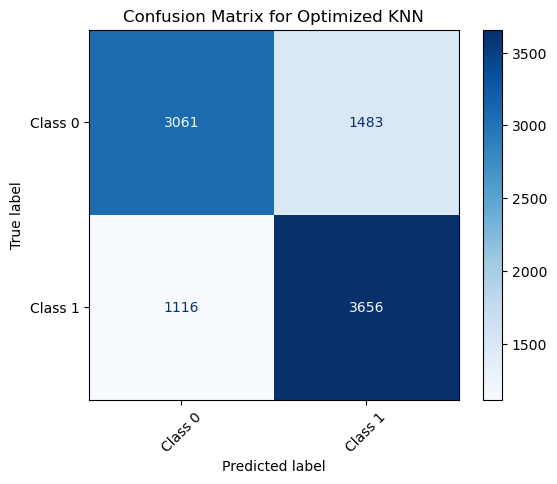

In [54]:
param_grid = {
    'classifier__n_neighbors': range(3, 20),  # Количество соседей
    'classifier__weights': ['uniform', 'distance'],  # Веса соседей
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  # Метрика расстояния
}


knn = Pipeline([('preprocessing', CT), 
                ('classifier', KNeighborsClassifier())])

grid_search = GridSearchCV(knn, param_grid, scoring=f2_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

# Предсказания и метрики на обучающей выборке
y_pred_train = best_knn.predict(X_train)
f2_train = fbeta_score(y_train, y_pred_train, beta=2**0.5)

# Предсказания и метрики на тестовой выборке
y_pred_KNN = best_knn.predict(X_test)
f2_test = fbeta_score(y_test, y_pred_KNN, beta=2**0.5)

# Вывод метрик F2
print(f'F2 метрика на обучающей выборке: {f2_train:.3f}')
print(f'F2 метрика на тестовой выборке: {f2_test:.3f}')

# Построение матрицы ошибок
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN, display_labels=['Class 0', 'Class 1'], 
                                               cmap='Blues', xticks_rotation=45)
disp.ax_.set_title('Confusion Matrix for Optimized KNN')
plt.show()

In [55]:
models_evalutions['Model'].append("KNeighborsClassifier")

models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_KNN))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_KNN))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_KNN))

models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_KNN, beta=2**0.5))

#### Logistic regression

In [56]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2})

params = {
    "C": [0.5, 1, 2, 5, 10],  
    "penalty": ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge) regularization
}

f2_scorer = make_scorer(fbeta_score, beta=2**0.5)  
lr_cv = GridSearchCV(lr, param_grid=params, n_jobs=-1, cv=10, scoring=f2_scorer)

lr_cv.fit(X_train, y_train)

print("Best params: ", lr_cv.best_params_)
print("Best estimator: ", lr_cv.best_estimator_)
print("Best score (F2): ", lr_cv.best_score_)

y_proba = lr_cv.predict_proba(X_test)

threshold = 0.3

y_pred_LR = (y_proba[:, 1] >= threshold).astype(int)

train_proba = lr_cv.predict_proba(X_train)
y_train_pred = (train_proba[:, 1] >= threshold).astype(int)

print("Training Score (F2):", fbeta_score(y_train, y_train_pred, beta=2**0.5))
print("Validation Score (F2):", fbeta_score(y_test, y_pred_LR, beta=2**0.5))

# Predictions and metrics
print("Logistic Regression Accuracy =", accuracy_score(y_test, y_pred_LR))
print("Logistic Regression F2 score =", fbeta_score(y_test, y_pred_LR, beta=2**0.5))

Best params:  {'C': 0.5, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=0.5, class_weight={0: 1, 1: 2}, solver='liblinear')
Best score (F2):  0.8449587841780606
Training Score (F2): 0.8072443307156094
Validation Score (F2): 0.8141387128655312
Logistic Regression Accuracy = 0.6679905538857879
Logistic Regression F2 score = 0.8141387128655312


In [57]:
models_evalutions['Model'].append("LogisticRegression")
# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_LR))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_LR))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_LR))
models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_LR, beta=2**0.5))

#### Decision Tree Classification       
отдельное дерево ожидаемо дает результат хуже

In [58]:
param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = f2_scorer)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
DecisionTreeClassifier(max_depth=4)


In [59]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [60]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(max_depth=4)

In [61]:
tree = DecisionTreeClassifier(criterion='gini',
                                     max_depth=4,
                                     max_features='sqrt',
                                  )

tree.fit(X_train,y_train)

print("Training Score In Decision Tree Classification:",tree.score(X_train, y_train))
print("Validation Score In Decision Tree: Classification",tree.score(X_test, y_test))
y_pred_DTC = tree.predict(X_test)

print("DT Accuracy=",accuracy_score(y_test, y_pred_DTC))
print("DT F2 score =", fbeta_score(y_test, y_pred_DTC, beta=2**0.5))

Training Score In Decision Tree Classification: 0.7234447963072299
Validation Score In Decision Tree: Classification 0.7118935165306999
DT Accuracy= 0.7118935165306999
DT F2 score = 0.7300702189178025


In [62]:
print(classification_report(y_test, y_pred_DTC, digits=3, zero_division = 1))
acc_nb = accuracy_score(y_test, y_pred_DTC)
recall_nb = recall_score(y_test, y_pred_DTC, average="binary")
print("ACCURACY:",accuracy_score(y_test, y_pred_DTC))
print("RECALL:",recall_score(y_test, y_pred_DTC, average="binary"))

              precision    recall  f1-score   support

         0.0      0.715     0.682     0.698      4544
         1.0      0.710     0.741     0.725      4772

    accuracy                          0.712      9316
   macro avg      0.712     0.711     0.711      9316
weighted avg      0.712     0.712     0.712      9316

ACCURACY: 0.7118935165306999
RECALL: 0.7407795473595976


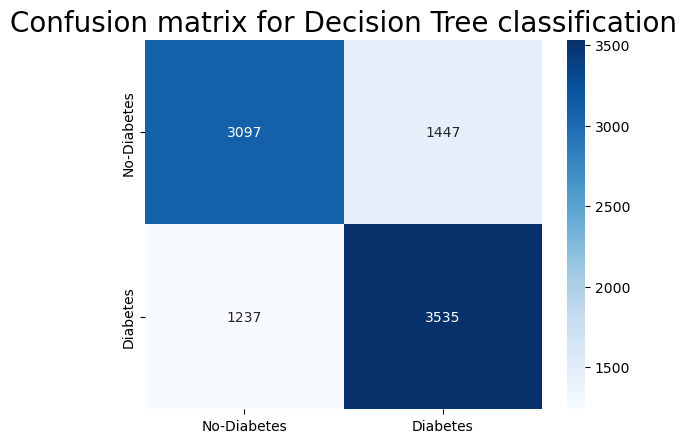

In [63]:
cm = confusion_matrix(y_test, y_pred_DTC)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree classification', fontsize = 20); 

In [64]:
models_evalutions['Model'].append("DecisionTreeClassifier")
# Оцениваем различные метрики
models_evalutions['Accuracy'].append(accuracy_score(y_test, y_pred_DTC))
models_evalutions['Recall'].append(recall_score(y_test, y_pred_DTC))
models_evalutions['Precision'].append(precision_score(y_test, y_pred_DTC))
models_evalutions['F2 score'].append(fbeta_score(y_test, y_pred_DTC, beta=2**0.5))

### GaussianNB

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score

nb = GaussianNB()

params = {
   
}

f2_scorer = make_scorer(fbeta_score, beta=2**0.5)  
nb_cv = GridSearchCV(nb, param_grid=params, n_jobs=-1, cv=10, scoring=f2_scorer)

nb_cv.fit(X_train, y_train)

print("Best params: ", nb_cv.best_params_)
print("Best estimator: ", nb_cv.best_estimator_)
print("Best score (F2): ", nb_cv.best_score_)

y_proba = nb_cv.predict_proba(X_test)

threshold = 0.3

y_pred_NB = (y_proba[:, 1] >= threshold).astype(int)

train_proba = nb_cv.predict_proba(X_train)
y_train_pred = (train_proba[:, 1] >= threshold).astype(int)

print("Training Score (F2):", fbeta_score(y_train, y_train_pred, beta=2**0.5))
print("Validation Score (F2):", fbeta_score(y_test, y_pred_NB, beta=2**0.5))

# Predictions and metrics
print("Naive Bayes Accuracy =", accuracy_score(y_test, y_pred_NB))
print("Naive Bayes F2 score =", fbeta_score(y_test, y_pred_NB, beta=2**0.5))


Best params:  {}
Best estimator:  GaussianNB()
Best score (F2):  0.7147167574942387
Training Score (F2): 0.7544530130348734
Validation Score (F2): 0.7595835305253195
Naive Bayes Accuracy = 0.729497638471447
Naive Bayes F2 score = 0.7595835305253195


### SVC - метод опорных векторов

In [ ]:
from sklearn.metrics import fbeta_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'C': [2, 3, 4, 5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)  

clf = GridSearchCV(svc_model, parameters, scoring=f2_scorer, cv=5)

print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)

print(f'Best Hyperparameters: {clf.best_params_}')

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

train_f2_class_1 = fbeta_score(y_train, y_train_pred, beta=2**0.5)
test_f2_class_1 = fbeta_score(y_test, y_test_pred, beta=2**0.5)

print(f"Train F2-Score (class 1): {train_f2_class_1}")
print(f"Test F2-Score (class 1): {test_f2_class_1}")

print('\nClassification Report (Validation):')
print(classification_report(y_val, y_test_pred, zero_division=1))


## Сравнение всех моделей : выбираем лучшую!

In [130]:
df = pd.DataFrame.from_dict(models_evalutions)
df = df.drop_duplicates(subset='Model', keep='last')
def highlight_top_3(s):
    top_3_indices = s.nlargest(4).index
    return ['background-color: pink' if i in top_3_indices else '' for i in s.index]

styled_df = df.style.apply(highlight_top_3, subset=['F2 score'])

styled_df

,Model,Accuracy,Precision,Recall,F2 score
1,GradientBoostingClassifier,0.750215,0.740318,0.789187,0.772196
3,VotingClassifier,0.738836,0.686553,0.901928,0.816543
5,KNeighborsClassifier,0.721018,0.711422,0.766136,0.746986
6,LogisticRegression,0.667991,0.609638,0.978206,0.814139
7,DecisionTreeClassifier,0.711894,0.709554,0.740780,0.730070
11,HistGradientBoostingClassifier,0.694075,0.632296,0.962490,0.819788
12,Stacking Classifier,0.703306,0.641011,0.956412,0.821651
13,RandomForestClassifier,0.739910,0.690141,0.893336,0.813498


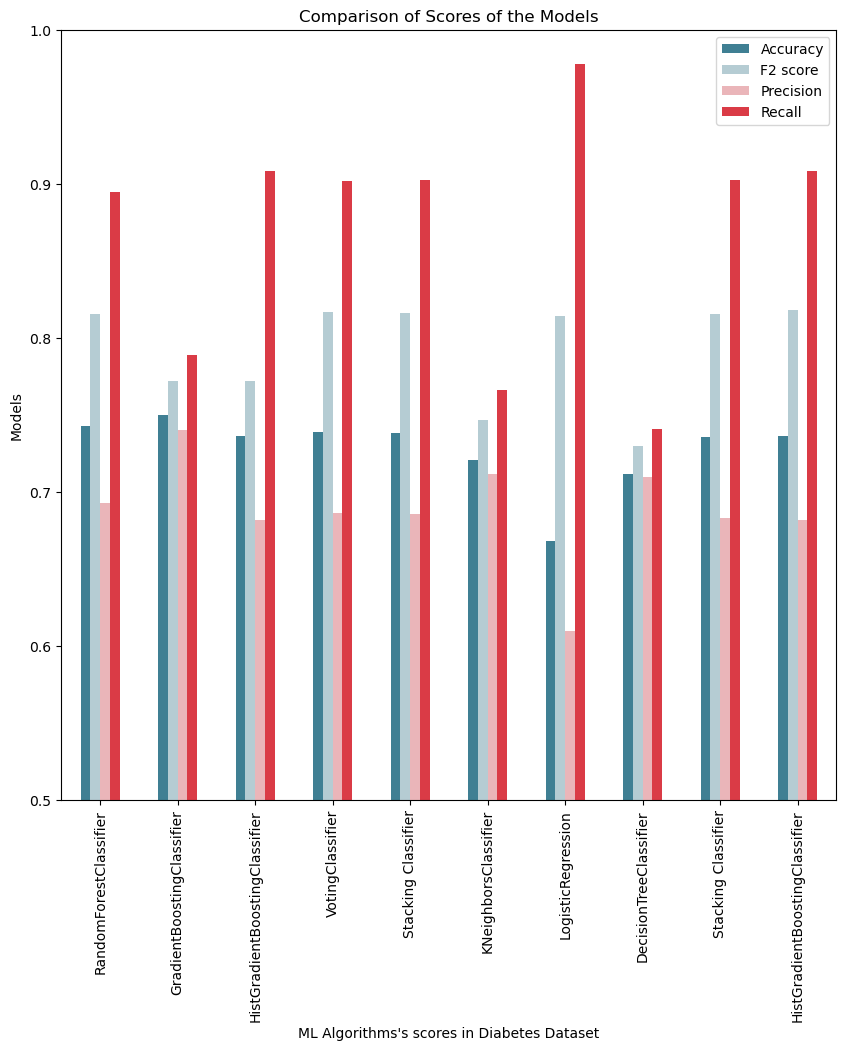

In [131]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
result.plot.bar(x='Model',y=['Accuracy','F2 score','Precision','Recall'], cmap=cmap, figsize=(10,10))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.ylim(0.50, 1.0)
plt.xlabel("ML Algorithms's scores in Diabetes Dataset")
plt.show()


## Работа с признаками

**Вывод по этому блоку**:        
1) проверка на мультиколлинеарность с помощью VIF показала что для всех фич VIF < 10, что говорит об отсутствии мультиколлинеарности
2) из п.1) следует предположить, что раз мультиколлинеарность отсутсвует, то метод главных компонент не даст значительных улучшений, что подтвердилось практически (см. раздел PCA)
3) c помощью Алгоритма иерархической кластеризации удалось выявить пять основных признаков, которые и составляют скажем "базу" обучения модели. однако, если оставить только 5 основных признаков, то метрика F2 в среднем по моделям выходит около 0,72,что ниже, чем если оставлять все признаки. Делаем вывод о том, что менее значимые признаки также играют роль в предсказаниях и помогают улучшать качество модели -> поэтому я их и оставила.

Лекция Соколова, заметки:        
1) дисперсия помогает отловить константные признаки
2) методы обертки: можно выкидывать признаки по одному и смотреть на качество. можно добавлять признаки по одному и смотреть на качество
3) можно проверить метод главных компонент

-----------------------------------------------------------------------------------------------------

"Когда признаки коллинеарны, перестановка одного признака мало повлияет на качество модели, поскольку она может получить ту же информацию от другого коррелированного признака.         

Одним из способов обработки мультиколлинеарных признаков является выполнение иерархической кластеризации ранговых корреляций Спирмена, выбор порога и сохранение одного признака из каждого кластера.        

Во-первых, мы строим тепловую карту коррелированных функций: "      

**Алгоритм иерархической кластеризации строит дендрограмму следующим образом**:     

Каждому признаку присваивается отдельная группа.      
Затем для каждой пары признаков вычисляется мера их схожести (например, корреляция Спирмена).       
Признаки, которые сильно коррелируют, объединяются в одну группу.        
Этот процесс продолжается до тех пор, пока все признаки не будут объединены в одну большую группу или пока не будет достигнут заранее установленный     порог схожести.          

Для кластеризации используется **метод связности Уорда**. Этот метод минимизирует сумму квадратов отклонений внутри кластера, что приводит к образованию компактных кластеров.

**Дендрограмма** — это графическое представление иерархической кластеризации. Каждый "вопрос" в дендрограмме показывает, как два признака объединяются в один кластер.

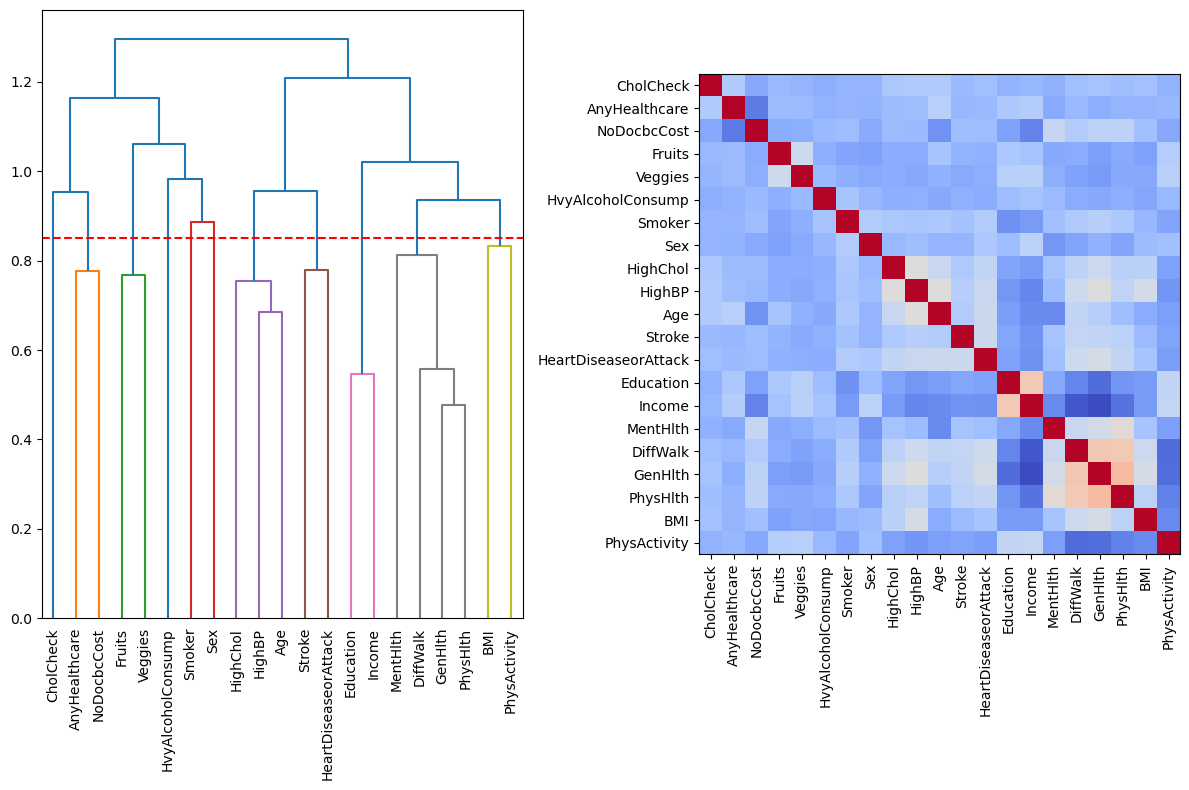

In [88]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np


feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Вычисляем корреляционную матрицу Спирмена
corr = spearmanr(X_train).correlation

# Убедимся, что матрица симметрична
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Преобразуем корреляционную матрицу в матрицу расстояний
distance_matrix = 1 - np.abs(corr)

# Кластеризация с использованием связности Уорда
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Дендрограмма
dendro = hierarchy.dendrogram(
    dist_linkage,
    labels=feature_names,  # Имена признаков
    ax=ax1,
    leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

# Вертикальная линия для выделения кластеров (опционально)
ax1.axhline(y=0.85, color='r', linestyle='--')

# Матрица корреляций
ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], cmap='coolwarm')
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(np.array(feature_names)[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(np.array(feature_names)[dendro["leaves"]])

fig.tight_layout()
plt.show()

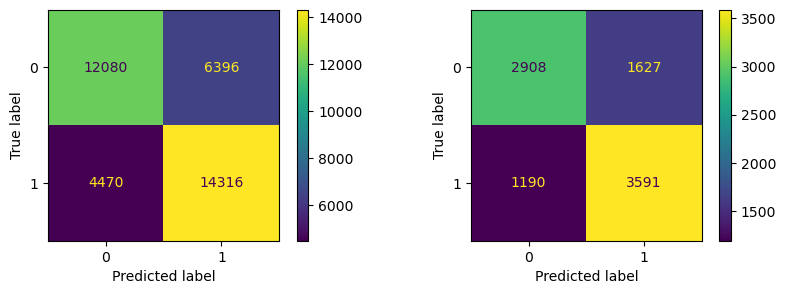

Индексы выбранных признаков: [0, 2, 3, 4, 8, 19]
Названия выбранных признаков: ['HighBP', 'CholCheck', 'BMI', 'Smoker', 'Fruits', 'Education']


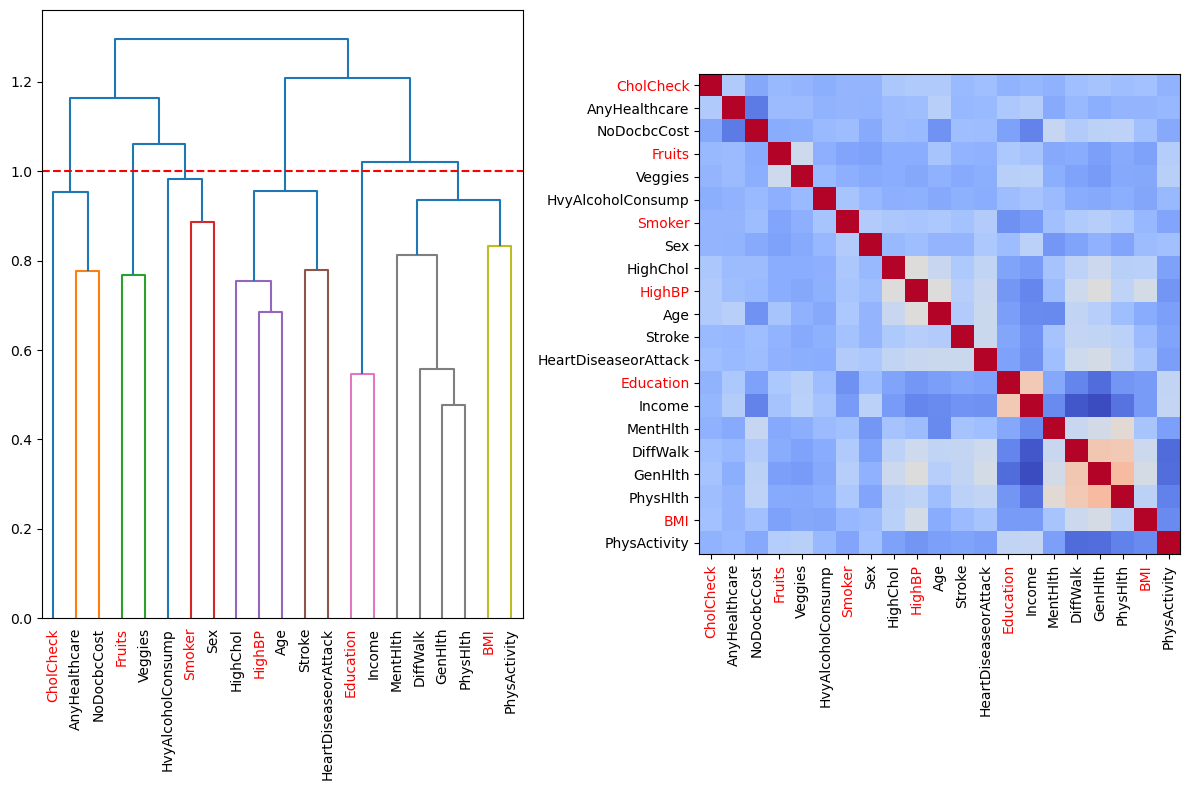

F2-Score на обучающем наборе данных: 0.75
F2-Score на тестовом наборе данных: 0.74


In [89]:
from collections import defaultdict
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score
import matplotlib.pyplot as plt
import numpy as np

# Вычисляем корреляционную матрицу
corr = spearmanr(X_train).correlation
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Матрица расстояний и кластеризация
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# Кластеризация признаков
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# Выбираем по одному признаку из каждого кластера
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# Выбираем соответствующие колонки из X_train и X_test
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

# Создаем и обучаем модель
clf_sel = RandomForestClassifier(n_jobs=-1, n_estimators=250, max_depth=10,
                                          min_samples_leaf=4, max_samples=0.5, max_features=0.2)
clf_sel.fit(X_train_sel, y_train)

# Предсказания
y_pred_train = clf_sel.predict(X_train_sel)
y_pred = clf_sel.predict(X_test_sel)

# Отображение матрицы ошибок
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot(ax=ax1)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(ax=ax2)
plt.show()

# Выводим имена выбранных признаков
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
selected_features_names = [feature_names[i] for i in selected_features]

print("Индексы выбранных признаков:", selected_features)
print("Названия выбранных признаков:", selected_features_names)

# Отображение дендрограммы и матрицы корреляций
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Дендрограмма
dendro = hierarchy.dendrogram(
    dist_linkage,
    labels=feature_names,
    ax=ax1,
    leaf_rotation=90
)
ax1.axhline(y=1, color='r', linestyle='--')

# Выделяем выбранные признаки на дендрограмме
[ax1.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i in selected_features]

# Матрица корреляций
dendro_idx = np.arange(0, len(dendro["ivl"]))
ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], cmap="coolwarm")
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(np.array(feature_names)[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(np.array(feature_names)[dendro["leaves"]])

#  выбранные признаки -> красные!
[ax2.get_xticklabels()[dendro["leaves"].index(i)].set_color('red') for i in selected_features]
[ax2.get_yticklabels()[dendro["leaves"].index(i)].set_color('red') for i in selected_features]

fig.tight_layout()
plt.show()

# Вычисление F2-Score на обучающих данных
f2_train = fbeta_score(y_train, y_pred_train, beta=2)

# Вычисление F2-Score на тестовых данных
f2_test = fbeta_score(y_test, y_pred, beta=2)

print(f"F2-Score на обучающем наборе данных: {f2_train:.2f}")
print(f"F2-Score на тестовом наборе данных: {f2_test:.2f}")


In [90]:
from sklearn.inspection import permutation_importance

**permutation_importance** — это метод, который измеряет, насколько сильно снижение точности модели связано с пермутацией (перестановкой) каждого признака. Процесс заключается в том, что для каждого признака поочередно случайным образом меняются значения (пермутация), и смотрится, как это влияет на точность модели.

In [91]:
# Вычисляем корреляционную матрицу
corr = spearmanr(X_train).correlation
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Матрица расстояний и кластеризация
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# Кластеризация признаков
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# Выбираем по одному признаку из каждого кластера
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# Выбираем соответствующие колонки из X_train и X_test
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

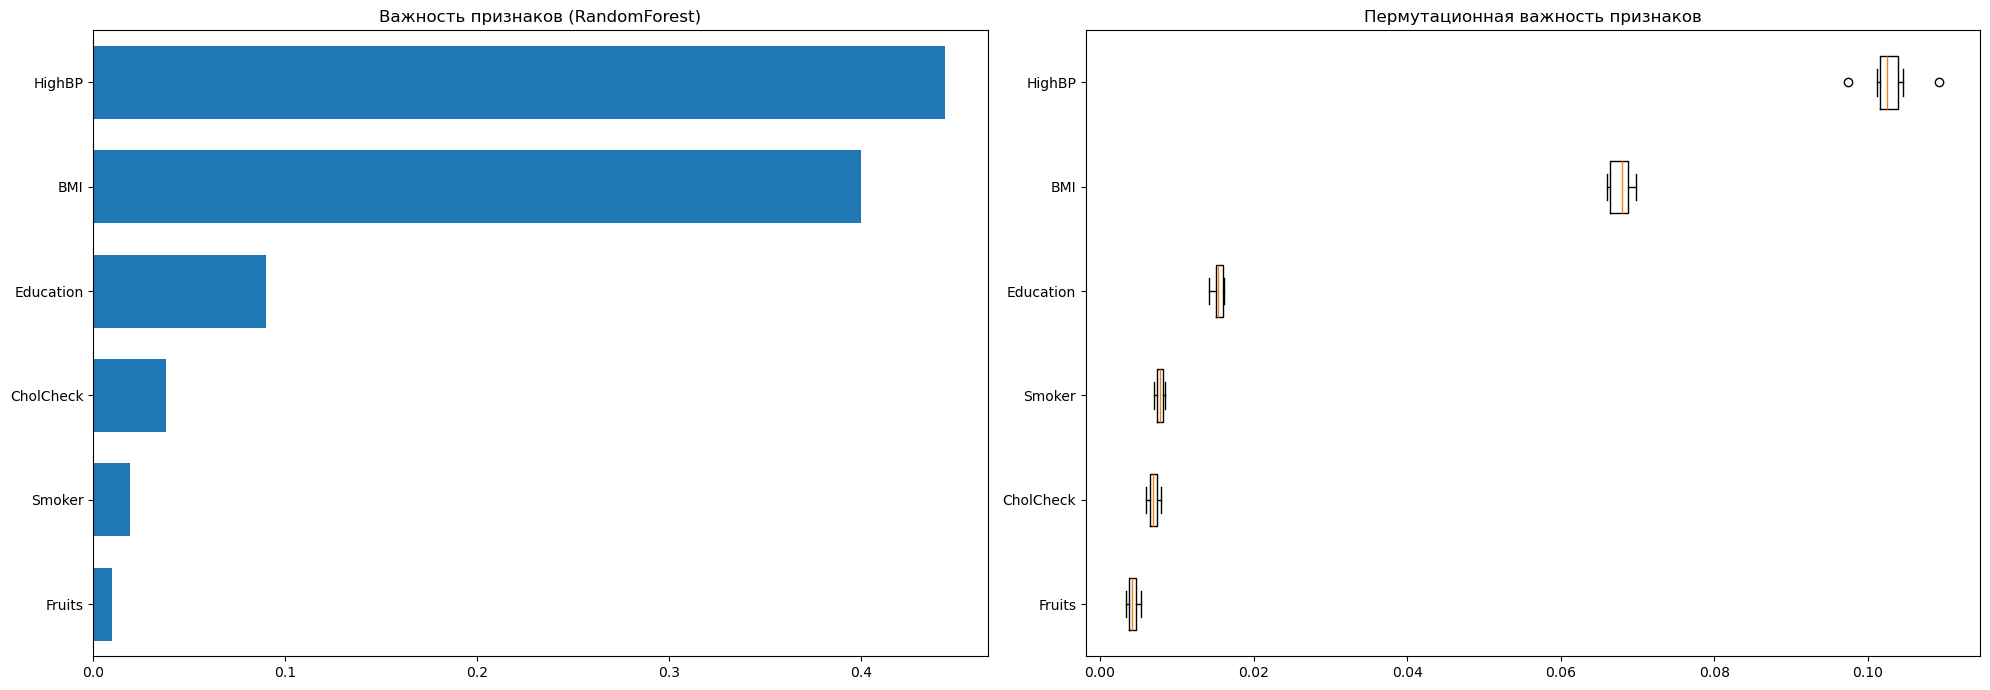

In [92]:
# Пермутационная важность признаков
result = permutation_importance(clf_sel, X_train_sel, y_train, n_repeats=10, random_state=42)

# Индексы признаков, отсортированные по важности (среднему значению пермутационной важности)
perm_sorted_idx = result.importances_mean.argsort()

# Индексы признаков, отсортированные по важности, вычисленной деревом
tree_importance_sorted_idx = np.argsort(clf_sel.feature_importances_)

# Создание индексов для визуализации
tree_indices = np.arange(0, len(clf_sel.feature_importances_)) + 0.5

# Настройка графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Визуализация важности признаков с помощью RandomForest (через feature_importances_)
# Обратите внимание, что индексирование правильно настроено
ax1.barh(tree_indices, clf_sel.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels([selected_features_names[i] for i in tree_importance_sorted_idx])  # Исправленная строка
ax1.set_ylim((0, len(clf_sel.feature_importances_)))
ax1.set_title("Важность признаков (RandomForest)")

# Визуализация пермутационной важности
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    tick_labels=[selected_features_names[i] for i in perm_sorted_idx],  # Исправленная строка
)
ax2.set_title("Пермутационная важность признаков")
fig.tight_layout()
plt.show()

,mean,std
HighBP,0.443643,0.079400
BMI,0.399881,0.067515
Education,0.090061,0.018504
CholCheck,0.037668,0.012237
Smoker,0.019156,0.005850
Fruits,0.009592,0.003210


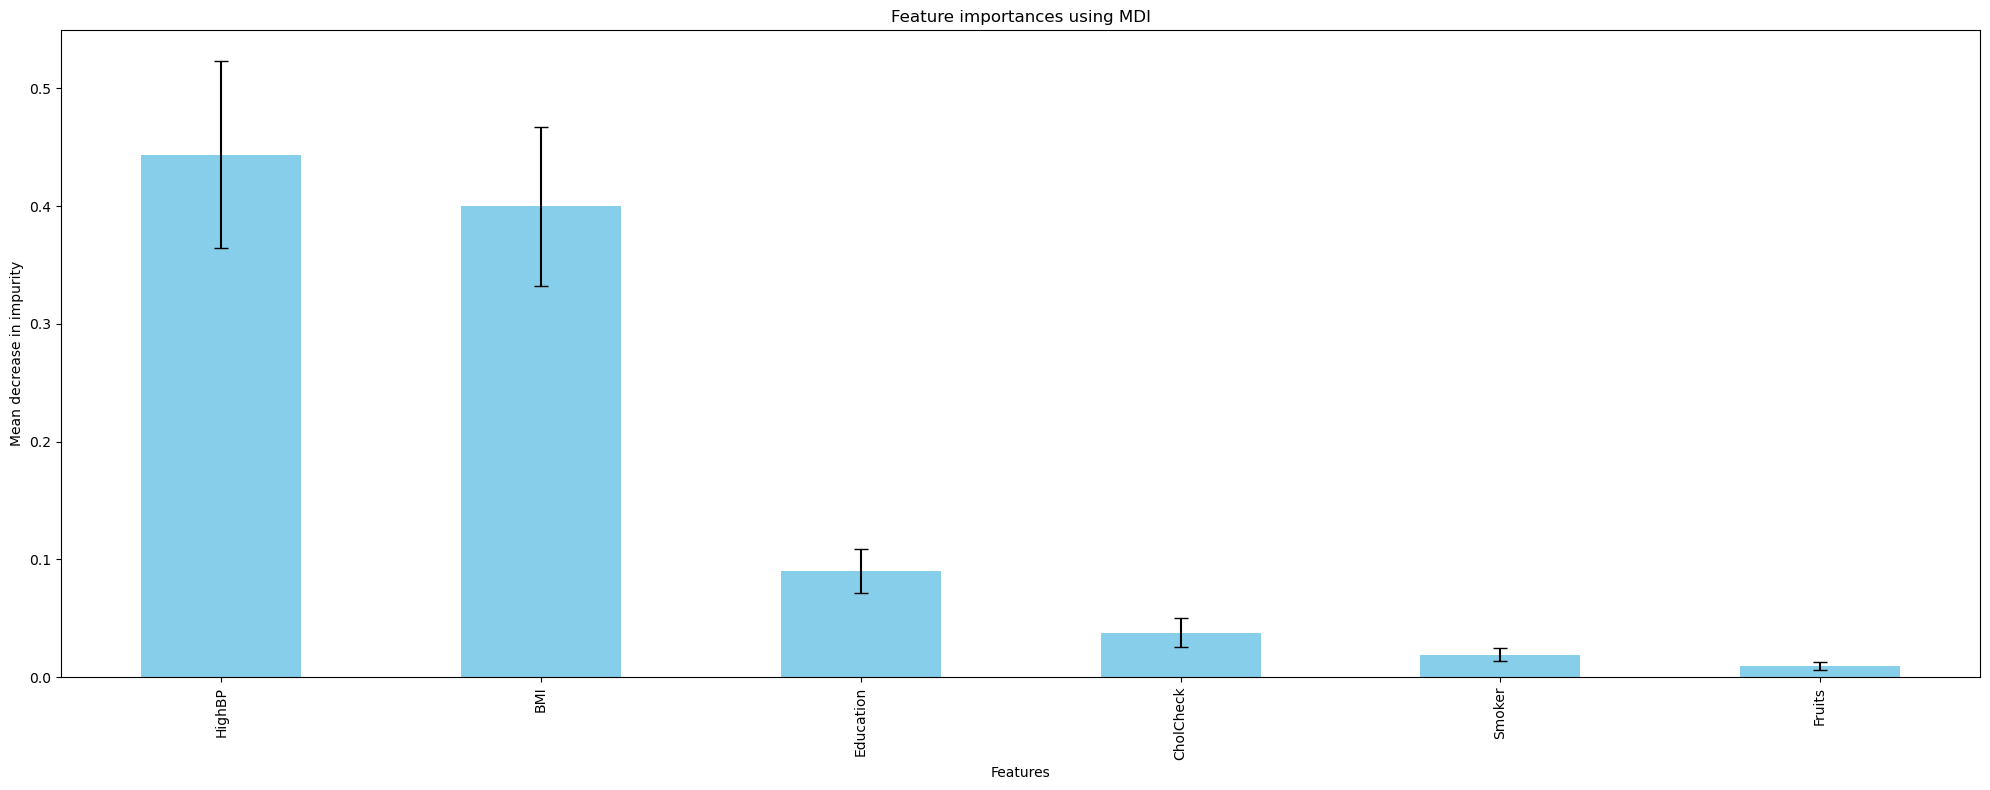

In [93]:
# Сортировка по важности признаков
forest_importances = pd.DataFrame(clf_sel.feature_importances_,
                                  index=selected_features_names, 
                                  columns=['mean'])

# Стандартное отклонение важности признаков для каждого дерева
forest_importances['std'] = np.std([tree.feature_importances_ for tree in clf_sel.estimators_], axis=0)

# Сортируем признаки по важности
sort_forest = forest_importances.sort_values(by='mean', ascending=False)

# Создание графика
fig, ax = plt.subplots(figsize=(20, 8))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax, color='skyblue', capsize=5)

# Настройка графика
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Features")
fig.tight_layout()

# Отображаем DataFrame с важностями
display(sort_forest)

In [94]:
print(X_train_sel.columns)
print(X_test_sel.columns)

Index(['HighBP', 'CholCheck', 'BMI', 'Smoker', 'Fruits', 'Education'], dtype='object')
Index(['HighBP', 'CholCheck', 'BMI', 'Smoker', 'Fruits', 'Education'], dtype='object')


In [138]:
# Создаем ColumnTransformer, применяя MinMaxScaler только к числовым данным
CT = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), X_train_sel.columns)  # Применяем ко всем признакам
    ],
    remainder='passthrough'  # Оставляем другие данные как есть
)

# Функция для применения трансформации без изменения имён столбцов
def fit_transform_with_names(transformer, X):
    transformed = transformer.fit_transform(X)
    return pd.DataFrame(transformed, columns=X.columns)  # Сохраняем имена столбцов

# Создаем pipeline
rf_1 = Pipeline([
    ('preprocessing', CT),
    ('classifier', RandomForestClassifier(n_jobs=-1, n_estimators=250, max_depth=10,
                                          min_samples_leaf=4, max_samples=0.5, max_features=0.2))
])

# Применяем fit_transform с сохранением имен столбцов
X_train_transformed = fit_transform_with_names(CT, X_train_sel)

# Обучаем модель
rf_1.fit(X_train_transformed, y_train)

# Предсказания
y_train_pred = rf_1.predict(X_train_transformed)
y_test_pred_RFC = rf_1.predict(X_test_sel)

# Вычисление F2-Score
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred_RFC, beta=2**0.5)

print(f'F2-Score на обучающем наборе: {f2_train:.3f}')
print(f'F2-Score на тестовом наборе: {f2_test:.3f}')

F2-Score на обучающем наборе: 0.745
F2-Score на тестовом наборе: 0.758


In [96]:
# Создаем ColumnTransformer, применяя MinMaxScaler только к числовым данным
CT = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), X_train_sel.columns)  # Применяем ко всем признакам
    ],
    remainder='passthrough'  # Оставляем другие данные как есть
)

# Функция для применения трансформации без изменения имён столбцов
def fit_transform_with_names(transformer, X):
    transformed = transformer.fit_transform(X)
    return pd.DataFrame(transformed, columns=X.columns)  # Сохраняем имена столбцов

# Создаем pipeline
rf_1 = Pipeline([
    ('preprocessing', CT),
    ('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))
])

# Применяем fit_transform с сохранением имен столбцов
X_train_transformed = fit_transform_with_names(CT, X_train_sel)

# Обучаем модель
rf_1.fit(X_train_transformed, y_train)

# Предсказания
y_train_pred = rf_1.predict(X_train_transformed)
y_test_pred_RFC = rf_1.predict(X_test_sel)

# Вычисление F2-Score
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred_RFC, beta=2)

print(f'F2-Score на обучающем наборе: {f2_train:.3f}')
print(f'F2-Score на тестовом наборе: {f2_test:.3f}')

F2-Score на обучающем наборе: 0.731
F2-Score на тестовом наборе: 0.841


## PCA
не дает улучшения на трейне, не дает улучшения на тесте -> использовать не буду

1) проверка для градиентного бустинга

F2-Score на обучающем наборе: 0.779
F2-Score на тестовом наборе: 0.480


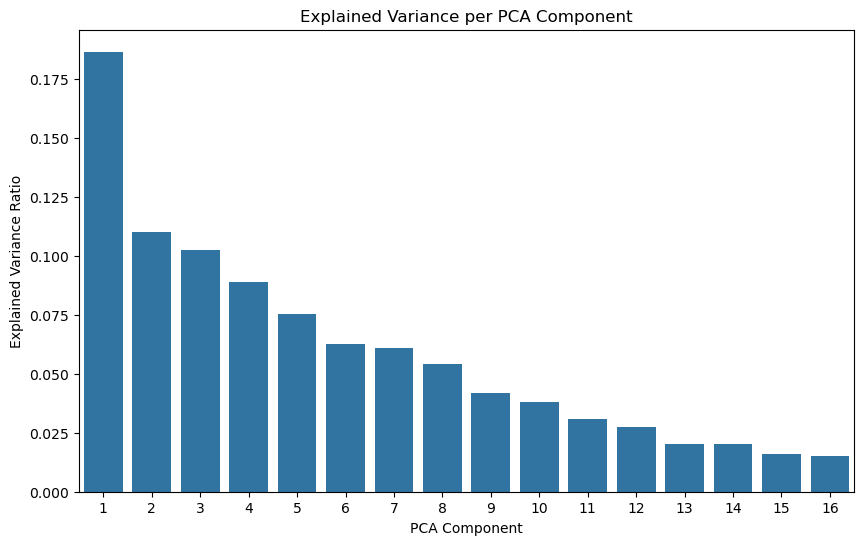

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем ColumnTransformer, применяя MinMaxScaler только к числовым данным
CT = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), X_train.columns)  # Применяем ко всем признакам
    ],
    remainder='passthrough'  # Оставляем другие данные как есть
)

# Функция для применения трансформации без изменения имён столбцов
def fit_transform_with_names(transformer, X):
    transformed = transformer.fit_transform(X)
    return pd.DataFrame(transformed, columns=X.columns)  # Сохраняем имена столбцов

# Применяем PCA для уменьшения размерности данных
def apply_pca(X, n_components=0.95):  # n_components - это доля объясненной дисперсии
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X)
    return pca_result, pca

# Применение PCA к отобранным признакам (X_train_sel)
X_train_pca, pca_model = apply_pca(X_train)

# Создаем pipeline с PCA и классификатором
rf_1 = Pipeline([
    ('preprocessing', CT),  # Применяем нормализацию данных
    ('pca', pca_model),  # Применяем PCA
    ('classifier', GradientBoostingClassifier(learning_rate=0.1, subsample=1, 
                                              n_estimators=170, max_features='sqrt'))
])

# Применяем fit_transform с сохранением имен столбцов для преобразования обучающего набора
X_train_transformed = fit_transform_with_names(CT, X_train)

# Обучаем модель
rf_1.fit(X_train_transformed, y_train)

# Предсказания
y_train_pred = rf_1.predict(X_train_transformed)
y_test_pred_RFC = rf_1.predict(X_test)

# Вычисление F2-Score
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred_RFC, beta=2)

print(f'F2-Score на обучающем наборе: {f2_train:.3f}')
print(f'F2-Score на тестовом наборе: {f2_test:.3f}')

# Визуализируем долю объясненной дисперсии для каждого компонента PCA
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(pca_model.explained_variance_ratio_) + 1), 
            y=pca_model.explained_variance_ratio_)
plt.title('Explained Variance per PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


2) для random forest

F2-Score на обучающем наборе: 0.808
F2-Score на тестовом наборе: 0.788


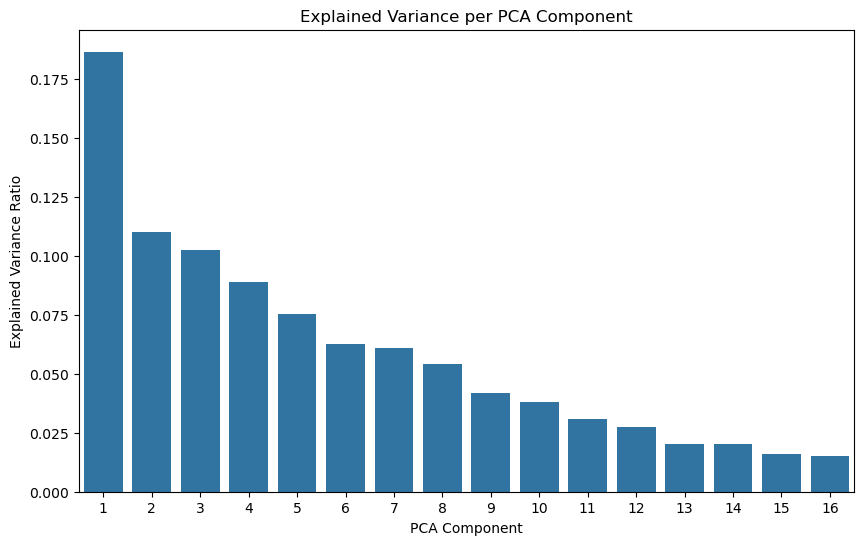

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем ColumnTransformer, применяя MinMaxScaler только к числовым данным
CT = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), X_train.columns)  # Применяем ко всем признакам
    ],
    remainder='passthrough'  # Оставляем другие данные как есть
)

# Функция для применения трансформации без изменения имён столбцов
def fit_transform_with_names(transformer, X):
    transformed = transformer.fit_transform(X)
    return pd.DataFrame(transformed, columns=X.columns)  # Сохраняем имена столбцов

# Применяем PCA для уменьшения размерности данных
def apply_pca(X, n_components=0.95):  # n_components - это доля объясненной дисперсии
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X)
    return pca_result, pca

# Применение PCA к отобранным признакам (X_train_sel)
X_train_pca, pca_model = apply_pca(X_train)

# Создаем pipeline с PCA и классификатором
rf_1 = Pipeline([
    ('preprocessing', CT),  # Применяем нормализацию данных
    ('pca', pca_model),  # Применяем PCA
    ('classifier', RandomForestClassifier(n_jobs=-1, n_estimators=250, max_depth=10,
                                          min_samples_leaf=4, max_samples=0.5, max_features=0.2))
])

# Применяем fit_transform с сохранением имен столбцов для преобразования обучающего набора
X_train_transformed = fit_transform_with_names(CT, X_train)

# Обучаем модель
rf_1.fit(X_train_transformed, y_train)

# Предсказания
y_train_pred = rf_1.predict(X_train_transformed)
y_test_pred_RFC = rf_1.predict(X_test)

# Вычисление F2-Score
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred_RFC, beta=2)

print(f'F2-Score на обучающем наборе: {f2_train:.3f}')
print(f'F2-Score на тестовом наборе: {f2_test:.3f}')

# Визуализируем долю объясненной дисперсии для каждого компонента PCA
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(pca_model.explained_variance_ratio_) + 1), 
            y=pca_model.explained_variance_ratio_)
plt.title('Explained Variance per PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


### проверка на мультиколлинеарность с помощью VIF

VIF (Variance Inflation Factor) — это показатель того, насколько сильно один из признаков в модели коррелирует с другими признаками.       
Если VIF для какого-то признака высок, это означает, что этот признак сильно коррелирует с другими и может создавать проблемы в модели (например,     усложнять интерпретацию коэффициентов или снижать точность предсказаний).     

мы видим, что значение VIF для признаков не превышает 1, что говорит об отсутствии мультиколлинеарности между признаками

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Добавляем константу для расчета VIF (перед этим добавьте константу, а потом исключим её из списка признаков)
X_train_const = add_constant(X_train)

# Вычисляем VIF для каждого признака, исключая константу
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(1, X_train_const.shape[1])]

# Выводим VIF для каждого признака
print(vif_data)

                 feature       VIF
0                 HighBP  1.342138
1               HighChol  1.174308
2              CholCheck  1.035506
3                    BMI  1.171906
4                 Smoker  1.076637
5                 Stroke  1.094859
6   HeartDiseaseorAttack  1.193536
7           PhysActivity  1.159229
8                 Fruits  1.096172
9                Veggies  1.096053
10     HvyAlcoholConsump  1.022109
11         AnyHealthcare  1.095380
12           NoDocbcCost  1.142093
13               GenHlth  1.860236
14              MentHlth  1.268833
15              PhysHlth  1.696915
16              DiffWalk  1.584441
17                   Sex  1.087023
18                   Age  1.329340
19             Education  1.313008
20                Income  1.531612
